### 1) Understanding Data



* a) Understand Columns

* b) check dtype -> df[col].astype()

* c) Describe Numerical Cols

* d) Describe Categorical Cols



### 2) EXTRACT FEATURES + EDA (uni - bi(heatmap) - multi) -> Insights:

* Uni-variate Analysis

    - Histogram (values)

    - distplot (distrbution)

    - catigorical (pie / count)



* Bi-Variate Analysis

    * Num vs Num

        - Scatter (relationship btn 2 variables)

        - line (trend with time)

    * Num vs Cat (distrbution)

        - box

        - violin

        - strip

    * Cat vs Cat

        - bar (estimate plot)

        - countplot (count rows)



* Multi-Variate Analysis

    * Pairplot



### 3) Pre-Processing Mind Map:

* a) Detect & Handle Duplicates

* b) train_test_split

* c) Detect & Handle NaNs

* d) Detect & Handle Outliers

* e) Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])

* f) Imbalanced: X_train_resampled

* g) Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_resampled_scaled

In [91]:
# Manpulate
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Feature Extraction
# import user_agents # get info from user_agent (browser_info)
# from ip2geotools.databases.noncommercial import DbIpCity as ip2geo # get location from ip
# from geopy.distance import great_circle # distance btn 2 (lat,long)
# from geopy.geocoders import Nominatim # geocode("place") / reverse("lat,long")
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # text feature

# Pre-Processing
from sklearn.model_selection import train_test_split # train-test-split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer # detect & handle NaNs
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder # Ordinal Encoding, Nominal Encoding
from category_encoders import BinaryEncoder # Nominal Encoding
from imblearn.under_sampling import RandomUnderSampler # undersampling
from imblearn.over_sampling import RandomOverSampler, SMOTE # oversampling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Scaling

# Modeling

## 1) Pipeline
from sklearn.pipeline import Pipeline, make_pipeline # to make pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector # apply pipeline to each column

## 2) Regression Models
from sklearn.linear_model import LinearRegression # if data is small and small_no_features
from sklearn.linear_model import SGDRegressor # if data is large: (can have penalty=constrains)
from sklearn.preprocessing import PolynomialFeatures # for polynomial regresion (then apply scaling after it)
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV # Regularization

## 2') Classfication Models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB, MultinomialNB
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor # Bagging & Pasting
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, HistGradientBoostingClassifier, HistGradientBoostingRegressor # Boosting
from sklearn.ensemble import VotingClassifier, VotingRegressor # Ensemble (Voting)
from sklearn.ensemble import StackingClassifier, StackingRegressor # Stacking

## 3) Model Selection (Underfitting vs Overfitting) [bias variance tradeoff => perfect model complexity]
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV, RandomizedSearchCV # (Train - Valid - Test) + hyperparameters tunning
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, HalvingRandomSearchCV # if data / features is large
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # Evaluate Model: r2=> accuracy, L2-norm: if no outliers, L1-norm: if outliers
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from scipy import stats # Confidence Interval of Accuracy / Loss / Utility
import joblib # save model

Dataset:

https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling?authuser=0

### 1) Understanding Data



* a) Understand Columns

* b) check dtype -> df[col].astype()

* c) Describe Numerical Cols

* d) Describe Categorical Cols

In [92]:
# a) Understand Columns

df = pd.read_csv("/kaggle/input/churn-modelling/Churn_Modelling.csv")
df # we should remove (RowNumber, CustomerId, Surname)

# CreditScore: 350 -> 850 (how much can he return borrowed credit)
# Tenure: number of years within the bank
# NumOfProducts: (number of products the customer use [CreditAccount - DepitAccount - CreditCard - ...])
# Exited: 1 (Churn: will leave) - 0 (Retained: will stay)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [93]:
# b) check dtype -> df[col].astype()

df.info() # all datatypes are great

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [94]:
# * c) Describe Numerical Cols

df.select_dtypes(include='number').describe()
# what is EstimatedSalary = 11.58 ??

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [95]:
df[df['EstimatedSalary'] < 100]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2362,2363,15791053,Lucciano,709,Germany,Male,45,4,122917.71,1,1,1,11.58,1
5548,5549,15639662,Phillips,710,France,Male,38,2,0.00,2,1,0,96.27,0
9010,9011,15786463,Hsing,645,Germany,Female,59,8,121669.93,2,0,0,91.75,1
9647,9648,15679693,Walker,625,France,Male,31,5,0.00,2,0,1,90.07,0


In [96]:
df[(df['EstimatedSalary'] < 100) & (df['Balance'] > 100e3)]

# could made loan but should be determined as individual feature
# or saving should be determined also as a feature

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2362,2363,15791053,Lucciano,709,Germany,Male,45,4,122917.71,1,1,1,11.58,1
9010,9011,15786463,Hsing,645,Germany,Female,59,8,121669.93,2,0,0,91.75,1


In [97]:
# droped them (2 undertermined points)

remove_idx = df[(df['EstimatedSalary'] < 100) & (df['Balance'] > 100e3)].index

df.drop(remove_idx, axis=0, inplace=True)
df.reset_index(inplace=True, drop=True)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9994,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9995,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9996,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [98]:
df.select_dtypes(include='number').describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9998.000000,9.998000e+03,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000
mean,5000.362673,1.569092e+07,650.523505,38.919184,5.012603,76476.725869,1.530206,0.705541,0.515103,100110.251598,0.203541
std,2886.785277,7.193007e+04,96.661182,10.486756,2.892292,62400.281536,0.581669,0.455822,0.499797,57498.834155,0.402651
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51036.905000,0.000000
50%,5000.500000,1.569073e+07,652.000000,37.000000,5.000000,97173.290000,1.000000,1.000000,1.000000,100218.210000,0.000000
75%,7499.750000,1.575321e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149395.882500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [99]:
# * d) Describe Categorical Cols

cat_cols = df.select_dtypes(include="O").columns

for col in cat_cols:
    print(f"number of uniques of \'{col}\' is: {df[col].nunique()}")
    print(f"uniques of \'{col}\' is:\n{df[col].unique()}")
    print()
    print('*' * 50)
    print()

number of uniques of 'Surname' is: 2932
uniques of 'Surname' is:
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']

**************************************************

number of uniques of 'Geography' is: 3
uniques of 'Geography' is:
['France' 'Spain' 'Germany']

**************************************************

number of uniques of 'Gender' is: 2
uniques of 'Gender' is:
['Female' 'Male']

**************************************************



In [100]:
for col in cat_cols:
    print(f"count of each unique in column \'{col}\' is:\n{df[col].value_counts()}")
    print()
    print('*' * 50)
    print()

count of each unique in column 'Surname' is:
Surname
Smith        32
Martin       29
Scott        29
Walker       28
Brown        26
             ..
Wells         1
Calzada       1
Gresswell     1
Aguirre       1
Morales       1
Name: count, Length: 2932, dtype: int64

**************************************************

count of each unique in column 'Geography' is:
Geography
France     5014
Germany    2507
Spain      2477
Name: count, dtype: int64

**************************************************

count of each unique in column 'Gender' is:
Gender
Male      5456
Female    4542
Name: count, dtype: int64

**************************************************



In [101]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9993,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9994,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9995,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9996,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## 2) Extract Features

In [102]:
## See Correlation oF ExtractedFeature with the target to see if it's relevent or not:

## Domain Knowledge

# CreditScore_Band: >= 750 ("Excellent") - 650 ("Good") - 550 (Avg) - else Poor
# Age_Group: (18-30) Young - Mid - Senior (> 51)
# Tenure_Band: (Short - Mid - Long Term)
# Balance_Category: (small - middum - large)
# Has_Balance: 0 or 1



# 1) Churn_Rate_By_Geography: for each geography how many churns [Target Leakage] Soln: "Calculate the number of customers in each geography or average tenure or average age in each geography."
# 2) Product_Engagement: isActive = 1 and NumOfProducts > 1 so he has high engagment

# 3)  Risk_Score = - CreditScore - (Tenure * 2) + (Age / 2) - (NumOfProducts * 5)
# 3') Risk_Value_Scaled = 0.25 * (1 - CreditScore/Max) + 0.25 * (1 - Tenure/Max) + 0.25 * (1 - Age/Max) + 0.25 * (1 - NumOfProducts/Max)

# 4) Distance_From_Branch: if availabe coordinates
# 5) Tenure_Percentage: (Tenure / Age) * 100
# 6) Balance_To_Products_Ratio: Balance / numofproducts



## Datetime/ Str / Text / Web / Ip / Geopy: Doesnt exsist with these features

In [103]:
# Product_Engagement

# => Very Low Engagment(isactive=0)
# Small Engagment, (isactive=1) Num = 1
# avg Engagment,
# above_avg Engagment,
# High Engagment

def extract_product_engagment(row):
    is_active, n_products = row['IsActiveMember'], row['NumOfProducts']
    
    if is_active == 0:
        return 'very_low_engagment'

    elif is_active == 1 and n_products == 1:
        return 'small_engagment'

    elif is_active == 1 and n_products == 2:
        return 'avg_engagment'

    elif is_active == 1 and n_products == 3:
        return 'above_avg_engagment'

    elif is_active == 1 and n_products == 4:
        return 'high_engagment'



df['products_engagment'] = df.apply(extract_product_engagment, axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,products_engagment
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,small_engagment
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,small_engagment
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,very_low_engagment
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,very_low_engagment
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,small_engagment
...,...,...,...,...,...,...,...,...,...,...,...,...
9993,771,France,Male,39,5,0.00,2,1,0,96270.64,0,very_low_engagment
9994,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,small_engagment
9995,709,France,Female,36,7,0.00,1,0,1,42085.58,1,small_engagment
9996,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,very_low_engagment


# EDA

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


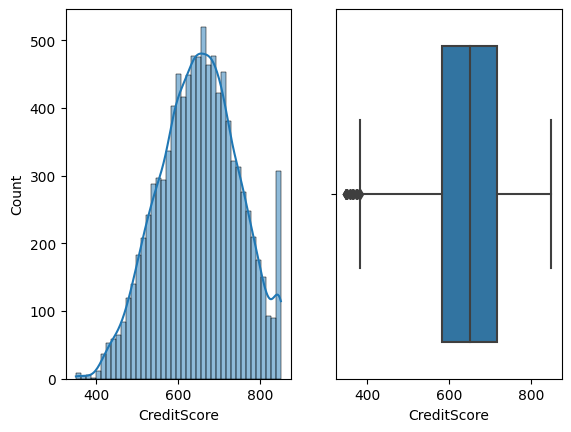

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


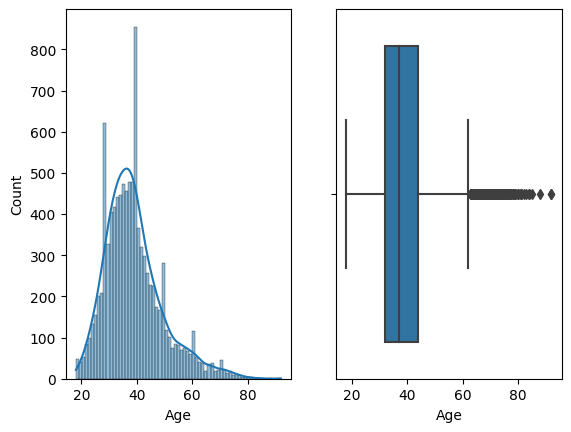

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


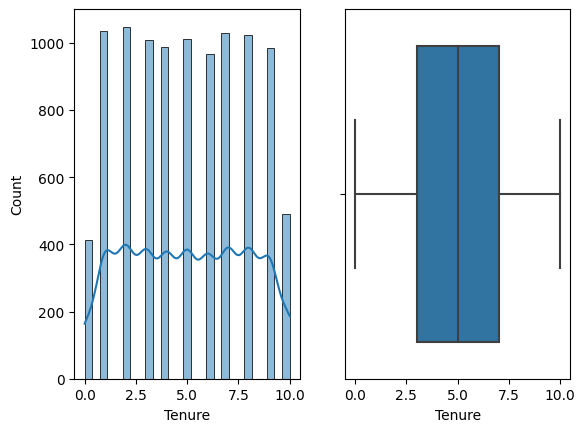

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


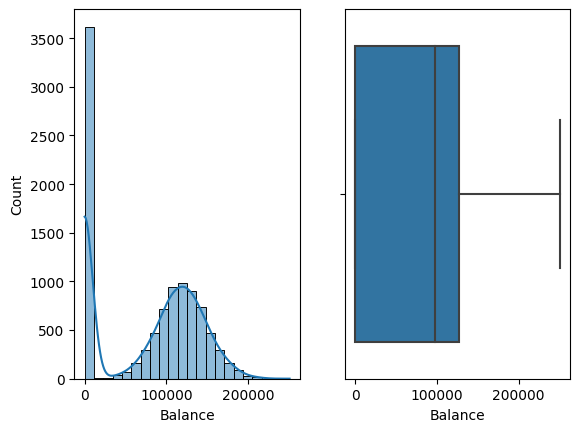

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


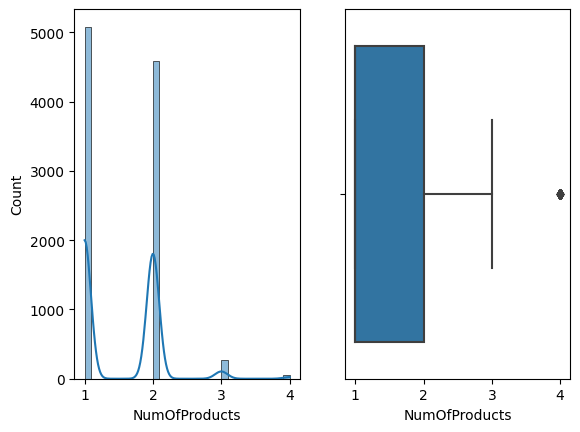

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


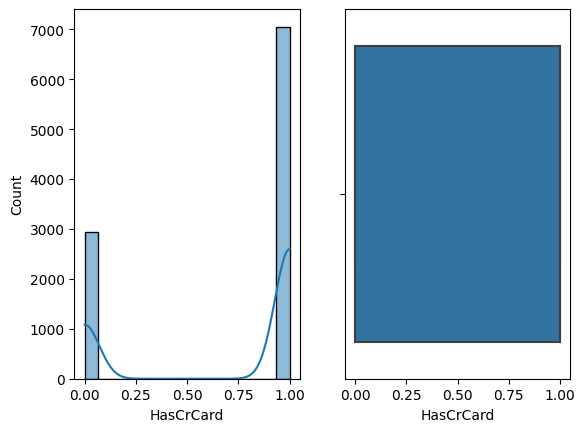

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


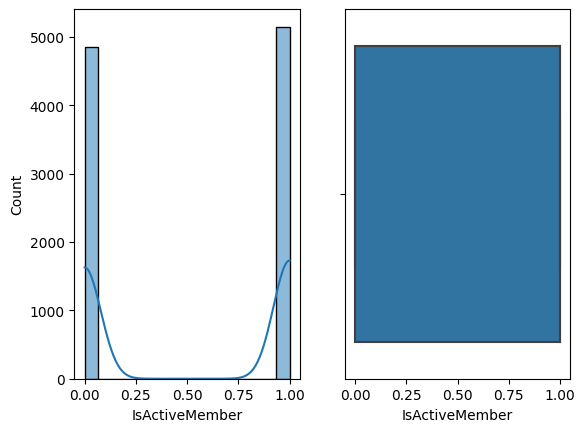

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


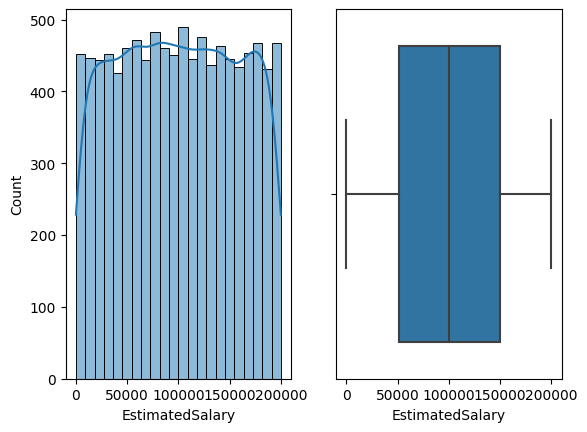

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


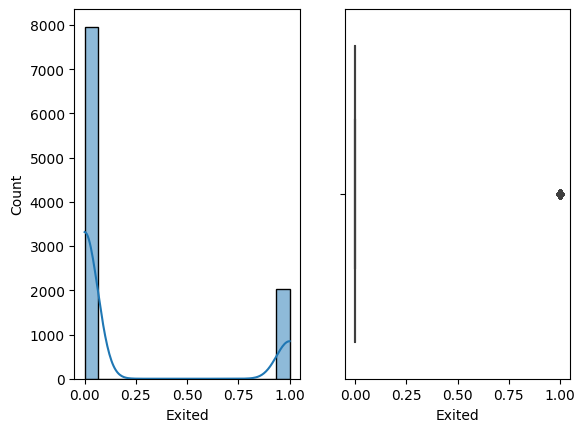

In [104]:
# UniVariate Analysis

num_cols = df.select_dtypes(include="number").columns

for col in num_cols:
    fig, axes= plt.subplots(nrows=1, ncols=2)
    sns.histplot(df[col], kde=True, ax=axes[0])
    sns.boxplot(x=df[col], ax=axes[1])
    plt.show()



# CreditScore: Normal Dist (no outliers)
# Age: Right Skewed
# Balance: Normal Dist but have left cap
# Estimated Salary: Uniform dist

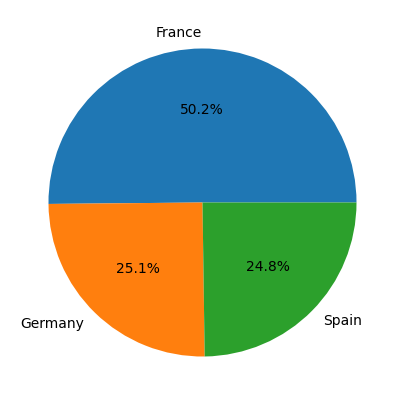

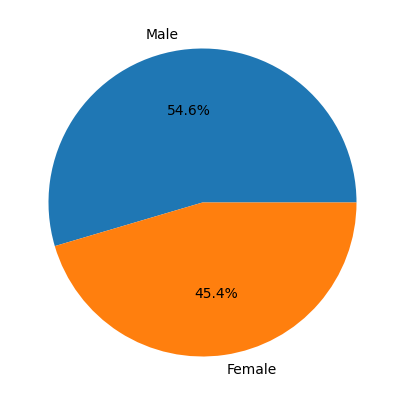

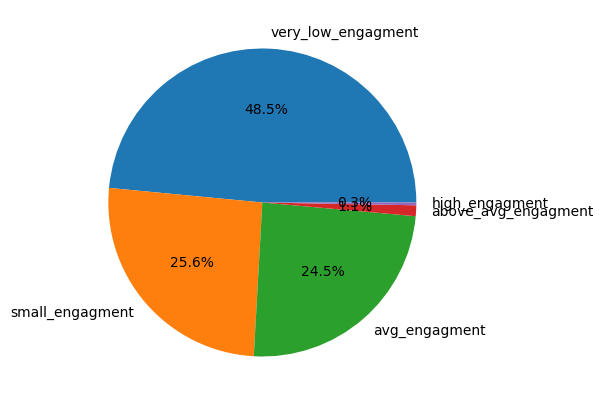

In [105]:
cat_cols = df.select_dtypes(include='O').columns

for col in cat_cols:
    plt.figure(figsize=(10, 5))
    
    if df[col].nunique() < 7:
        dff = df.groupby(col)[['EstimatedSalary']].count().reset_index().sort_values(by='EstimatedSalary', ascending=False)
        plt.pie(labels=dff[col], x=dff['EstimatedSalary'], autopct="%1.1f%%")
        
    elif df[col].nunique() < 50:
        sns.countplot(x=df[col])

    else: # > 50 get top 10
        dff = df.groupby(col)[['EstimatedSalary']].count().reset_index().sort_values(by='EstimatedSalary', ascending=False).head(10)
        sns.countplot(x=dff[col])

    plt.show()

<Axes: >

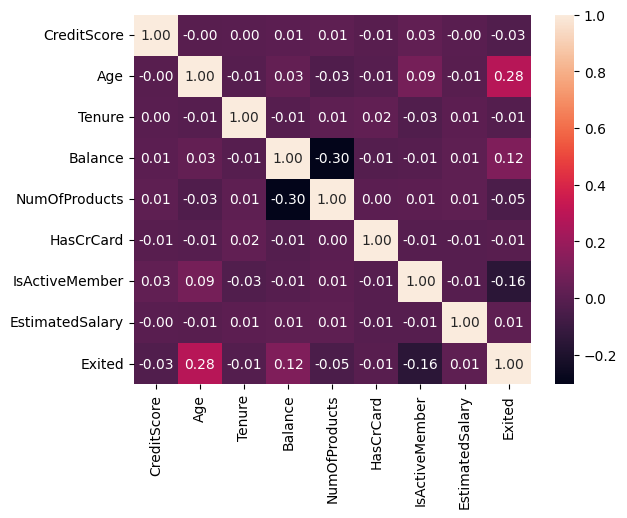

In [106]:
# Bi-Variate

sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt='.2f')

<Axes: >

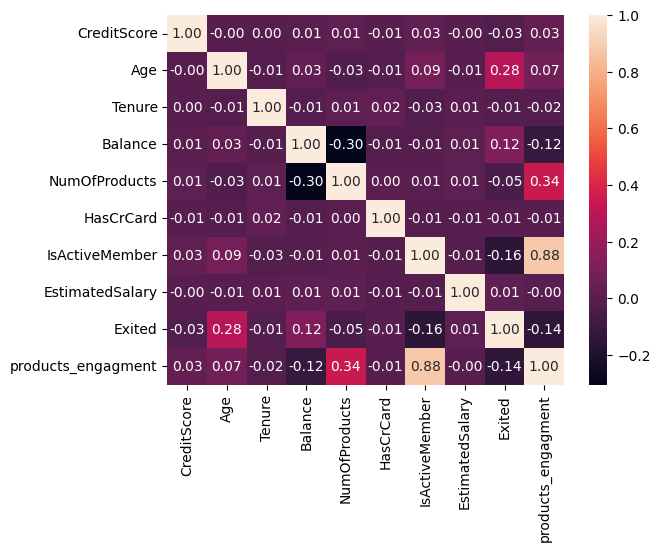

In [107]:
# good feat

dff = df.copy()
ordinal_inst = OrdinalEncoder(categories=[['very_low_engagment', 'small_engagment', 'avg_engagment', 'above_avg_engagment', 'high_engagment']])
dff[['products_engagment']] = ordinal_inst.fit_transform(dff[['products_engagment']])

sns.heatmap(dff.select_dtypes(include='number').corr(), annot=True, fmt='.2f')

<Axes: xlabel='Geography', ylabel='Exited'>

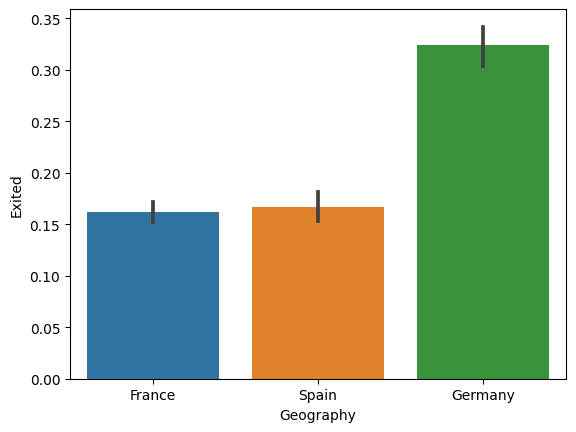

In [108]:
# Q1: how many people exited/churned from each country

sns.barplot(x=df['Geography'], y=df['Exited'], estimator=np.mean)

<Axes: xlabel='products_engagment', ylabel='Exited'>

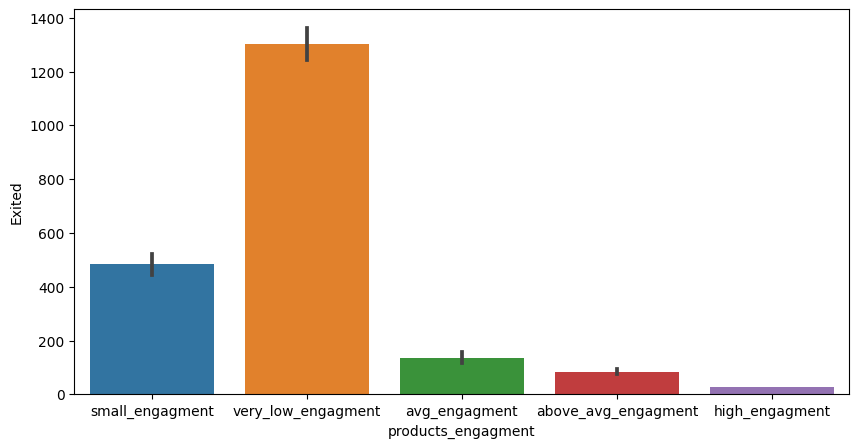

In [109]:
# Q2: Relation Ship Between products engagment and Exited

plt.figure(figsize=(10, 5))
sns.barplot(x=df['products_engagment'], y=df['Exited'], estimator=np.sum)

<Axes: xlabel='Geography', ylabel='NumOfProducts'>

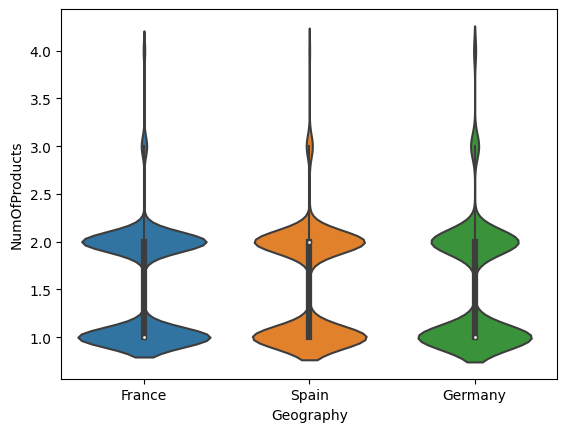

In [110]:
# Q3: Num of Products from each country

sns.violinplot(x=df['Geography'], y=df['NumOfProducts'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

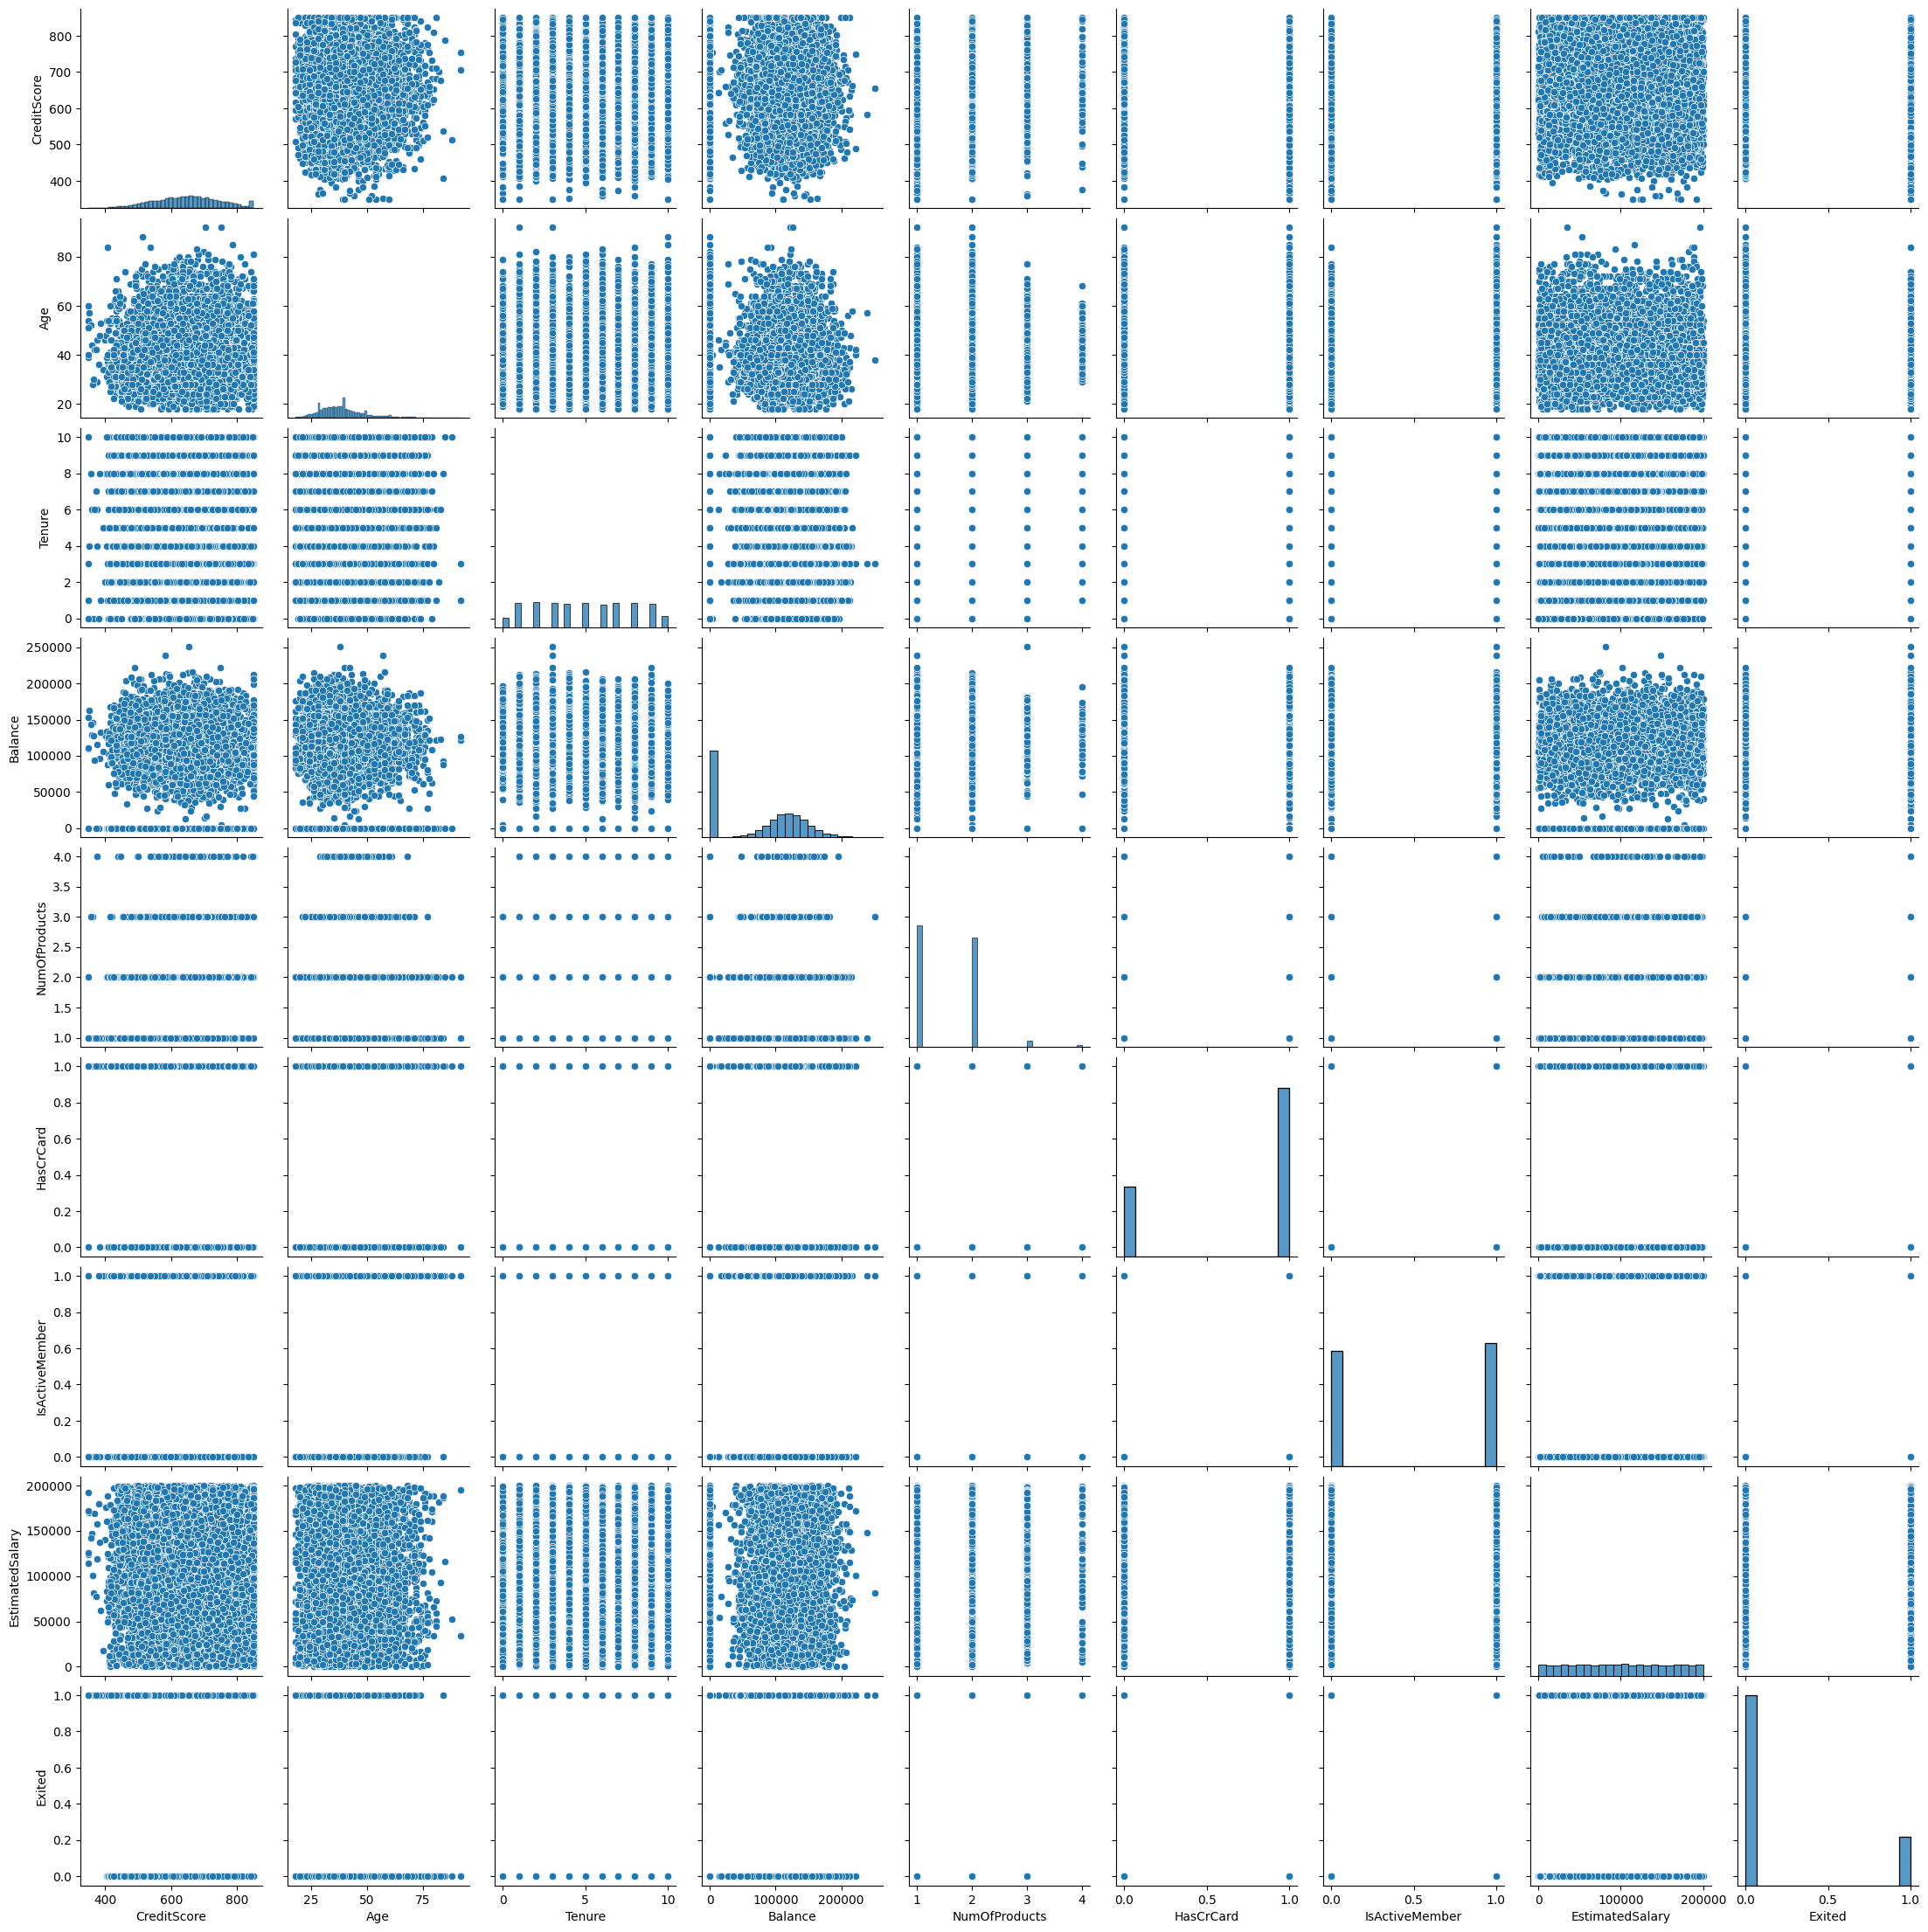

In [111]:
# MultiVariate

sns.pairplot(df.select_dtypes(include='number'))

### 3) Pre-Processing Mind Map:

* a) Detect & Handle Duplicates

* b) train_test_split

* c) Detect & Handle NaNs

* d) Detect & Handle Outliers

* e) Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])

* f) Imbalanced: X_train_resampled

* g) Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_resampled_scaled

In [112]:
# a) Detect & Handle Duplicates

df.duplicated().sum()

0

In [113]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,products_engagment
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,small_engagment
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,small_engagment
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,very_low_engagment
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,very_low_engagment
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,small_engagment
...,...,...,...,...,...,...,...,...,...,...,...,...
9993,771,France,Male,39,5,0.00,2,1,0,96270.64,0,very_low_engagment
9994,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,small_engagment
9995,709,France,Female,36,7,0.00,1,0,1,42085.58,1,small_engagment
9996,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,very_low_engagment


In [114]:
df['Exited'].value_counts(normalize=True)

Exited
0    0.796459
1    0.203541
Name: proportion, dtype: float64

In [115]:
# b) train_test_split

X = df.drop(["Exited"], axis=1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,products_engagment
2572,689,Spain,Male,40,2,0.00,2,1,1,164768.82,avg_engagment
4580,572,France,Female,47,2,0.00,2,1,0,36099.70,very_low_engagment
7567,422,Spain,Female,54,4,0.00,2,1,1,7166.71,avg_engagment
6516,628,Germany,Female,51,9,155903.82,2,1,1,71159.84,avg_engagment
6564,663,France,Female,33,2,0.00,2,1,0,153295.00,very_low_engagment
...,...,...,...,...,...,...,...,...,...,...,...
9216,676,Germany,Female,48,2,124442.38,1,1,0,15068.53,very_low_engagment
4643,712,Spain,Male,74,5,0.00,2,0,0,151425.82,very_low_engagment
8941,667,France,Female,37,9,71786.90,2,1,1,67734.79,avg_engagment
2934,687,Spain,Male,35,8,100988.39,2,1,0,22247.27,very_low_engagment


In [116]:
X_test.shape # good enough

(2000, 11)

In [117]:
X_train.isna().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
products_engagment    0
dtype: int64

In [118]:
y_train.value_counts()

Exited
0    6370
1    1628
Name: count, dtype: int64

In [119]:
y_train.value_counts(normalize=True)

# Target Imbalanced => Solved using:
# SMOTE or class_weight attribute in each model

Exited
0    0.796449
1    0.203551
Name: proportion, dtype: float64

In [120]:
from sklearn.base import TransformerMixin, BaseEstimator


class LogTransformer(BaseEstimator, TransformerMixin):

    # fit
    def fit(self, X, y=None):
        # self.feature_names = list(X.columns)
        self.n_features_in = X.shape[1]
        return self

    # transformer
    def transform(self, X, y=None):
        assert self.n_features_in == X.shape[1]
        return np.log(X)

    # def get_feature_names_out(self, X, y=None):
    #     return self.feature_names



log_transformer = LogTransformer()
log_transformer

LogTransformer()

In [121]:
df['products_engagment'].unique()

array(['small_engagment', 'very_low_engagment', 'avg_engagment',
       'above_avg_engagment', 'high_engagment'], dtype=object)

In [122]:
# * c) Detect & Handle NaNs
# * d) Detect & Handle Outliers
# * e) Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])
# * f) Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_resampled_scaled
# * g) Imbalanced: X_train_resampled

""""
CreditScore: mean => no outliers =>
Geography: mode => OHE (uniques < 7)
Gender: mode => OHE
Age:  median => log
Tenure: mode => encoded
Balance: median => no outlier
NumOfProducts: mode => encoded
HasCrCard: mode => encoded
IsActiveMember: mode => encoded
EstimatedSalary: mean (irrelevent feat) =>
products_engagment: mode => Ordinal
"""

geo_gender_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(drop='first', sparse_output=False))
])

products_engage_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder(categories=[['very_low_engagment', 'small_engagment', 'avg_engagment', 'above_avg_engagment', 'high_engagment']]))
])

tenure_products_cc_active_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent'))
])

creditscore_estimated_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler()),
])

age_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    ('handle_outliers', LogTransformer()),
    ('scale', RobustScaler()),
])

balance_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    ('scale', RobustScaler()),
])

In [123]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,products_engagment
2572,689,Spain,Male,40,2,0.00,2,1,1,164768.82,avg_engagment
4580,572,France,Female,47,2,0.00,2,1,0,36099.70,very_low_engagment
7567,422,Spain,Female,54,4,0.00,2,1,1,7166.71,avg_engagment
6516,628,Germany,Female,51,9,155903.82,2,1,1,71159.84,avg_engagment
6564,663,France,Female,33,2,0.00,2,1,0,153295.00,very_low_engagment
...,...,...,...,...,...,...,...,...,...,...,...
9216,676,Germany,Female,48,2,124442.38,1,1,0,15068.53,very_low_engagment
4643,712,Spain,Male,74,5,0.00,2,0,0,151425.82,very_low_engagment
8941,667,France,Female,37,9,71786.90,2,1,1,67734.79,avg_engagment
2934,687,Spain,Male,35,8,100988.39,2,1,0,22247.27,very_low_engagment


In [124]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'products_engagment'],
      dtype='object')

In [125]:
preprocessor = ColumnTransformer(transformers=[
    ('geo_gender_pipe', geo_gender_pipe, ['Geography', 'Gender']),
    ('products_engage_pipe', products_engage_pipe, ['products_engagment']),
    ('tenure_products_cc_active_pipe', tenure_products_cc_active_pipe, ['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']),
    ('creditscore_estimated_pipe', creditscore_estimated_pipe, ['CreditScore', 'EstimatedSalary']),
    ('age_pipe', age_pipe, ['Age']),
    ('balance_pipe', balance_pipe, ['Balance']),
])

preprocessor

ColumnTransformer(transformers=[('geo_gender_pipe',
                                 Pipeline(steps=[('handle_nans',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['Geography', 'Gender']),
                                ('products_engage_pipe',
                                 Pipeline(steps=[('handle_nans',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode',
                                                  OrdinalEncoder(categories=[['very_lo...
                                                  SimpleImputer()),
                                                 ('scale', StandardScaler())]),
                                 ['CreditScore', 'EstimatedSalary']),
                                ('age_pipe',
                                 Pipeline(steps=[('handle_nans',
                                                  SimpleImputer(strategy='median')),
                                                 ('handle_outliers',
                                                  LogTransformer()),
                                                 ('scale', RobustScaler())]),
                                 ['Age']),
                                ('balance_pipe',
                                 Pipeline(steps=[('handle_nans',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', RobustScaler())]),
                                 ['Balance'])])

In [126]:
X_trian_scaled = preprocessor.fit_transform(X_train)
X_trian_scaled

array([[ 0.        ,  1.        ,  1.        , ...,  1.13596471,
         0.24481277, -0.76170152],
       [ 0.        ,  0.        ,  0.        , ..., -1.11046968,
         0.75122275, -0.76170152],
       [ 0.        ,  1.        ,  0.        , ..., -1.6156108 ,
         1.18719329, -0.76170152],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.55815259,
         0.        , -0.19990914],
       [ 0.        ,  1.        ,  1.        , ..., -1.35231928,
        -0.17449898,  0.02861688],
       [ 0.        ,  1.        ,  1.        , ..., -1.0274331 ,
         1.00770595, -0.76170152]])

In [127]:
X_trian_scaled.shape

(7998, 12)

In [128]:
X_test_scaled = preprocessor.transform(X_test)
X_test_scaled

array([[ 0.        ,  0.        ,  1.        , ..., -0.09464577,
        -0.08603754, -0.76170152],
       [ 1.        ,  0.        ,  1.        , ..., -0.77921602,
        -0.35926836,  0.26366871],
       [ 0.        ,  1.        ,  0.        , ...,  0.10002978,
         0.24481277, -0.76170152],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.87137965,
         0.75122275,  0.24234316],
       [ 0.        ,  0.        ,  1.        , ..., -1.4802969 ,
         0.16531046, -0.76170152],
       [ 0.        ,  0.        ,  1.        , ..., -0.49532375,
        -0.35926836,  0.43019433]])

# 4) Modeling



* 1) Simple Model & Validate it's perfromance



* 2) Underfitting vs Overfitting



* 3) Hyperparameters Tunning (best 5 Promissing models)



* 4) Ensemble (if needed)



* 5) Test Performance and it's CI



* 6) Save Model and load in streamlit application or flask application

In [129]:
# dont forget we didnt solve imbalanced yet why ?! => could be solved using: (Over/Under [or] class_weight)
# let's try class_weight

log_reg = LogisticRegression(random_state=42, C=1.0, max_iter=100, warm_start=True, class_weight='balanced')
log_reg.fit(X_trian_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42, warm_start=True)

In [130]:
log_reg.score(X_trian_scaled, y_train)

0.7056764191047762

In [131]:
y_valid_pred = cross_val_predict(log_reg, X_trian_scaled, y_train, cv=3)
confusion_matrix(y_true=y_train, y_pred=y_valid_pred)
# if customer will be churn (we will use rentenation stratiges) who rentenate will remain
# so if model predicted rentenated as churn (will get stratiges) so not a big deal

# the problem if churn predicted as rentated customer (we will lose him) so we need:
# (precision = Tp / (Tp + Fp) FP is not important so small precision is not big deal)
# (recall = Tp / (TP + FN) FN should be small so large recall)

array([[4494, 1876],
       [ 479, 1149]])

In [132]:
print(f"Validation Precision Score: {precision_score(y_train, y_valid_pred)}")
print(f"Validation Recall Score: {recall_score(y_train, y_valid_pred)}")
print(f"Validation f1 Score: {f1_score(y_train, y_valid_pred)}")

Validation Precision Score: 0.37983471074380165
Validation Recall Score: 0.7057739557739557
Validation f1 Score: 0.49387491940683437


In [133]:
y_train_pred = log_reg.predict(X_trian_scaled)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")

Train Accuracy: 0.7056764191047762
Validation Accuracy: 0.7055513878469617


In [134]:
# dataset is non linear (bcz our linear model underfit it)

### Underfitting Solutions:



* 1) More Complex Model



* 2) Extract More Features (PolynomialFeatures)



* 3) descrease constrains

In [135]:
# 2) Extract More Features (PolynomialFeatures)

geo_gender_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(drop='first', sparse_output=False))
])

products_engage_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder(categories=[['very_low_engagment', 'small_engagment', 'avg_engagment', 'above_avg_engagment', 'high_engagment']]))
])


tenure_products_cc_active_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent'))
])


creditscore_estimated_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='mean')),
    ('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('scale', StandardScaler()),
])

age_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('handle_outliers', LogTransformer()),
    ('scale', RobustScaler()),
])

balance_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('scale', RobustScaler()),
])

preprocessor = ColumnTransformer(transformers=[
    ('geo_gender_pipe', geo_gender_pipe, ['Geography', 'Gender']),
    ('products_engage_pipe', products_engage_pipe, ['products_engagment']),
    ('tenure_products_cc_active_pipe', tenure_products_cc_active_pipe, ['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']),
    ('creditscore_estimated_pipe', creditscore_estimated_pipe, ['CreditScore', 'EstimatedSalary']),
    ('age_pipe', age_pipe, ['Age']),
    ('balance_pipe', balance_pipe, ['Balance']),
])

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.fit_transform(X_test)

In [136]:
log_reg = LogisticRegression(random_state=42, C=1.0, max_iter=1000, warm_start=False, class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)
y_train_pred = log_reg.predict(X_train_scaled) # train
y_valid_pred = cross_val_predict(log_reg, X_train_scaled, y_train, cv=3) # valid
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")

Train Accuracy: 0.710302575643911
Validation Accuracy: 0.705051262815704


### More Complex Model

In [137]:
# 2) Extract More Features (PolynomialFeatures)



geo_gender_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(drop='first', sparse_output=False))
])

products_engage_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder(categories=[['very_low_engagment', 'small_engagment', 'avg_engagment', 'above_avg_engagment', 'high_engagment']]))
])


tenure_products_cc_active_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent'))
])

creditscore_estimated_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='mean')),
    # ('poly', PolynomialFeatures(degree=5, include_bias=True)),
    ('scale', StandardScaler()),
])

age_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    # ('poly', PolynomialFeatures(degree=5, include_bias=True)),
    ('handle_outliers', LogTransformer()),
    ('scale', RobustScaler()),
])

balance_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    # ('poly', PolynomialFeatures(degree=5, include_bias=True)),
    ('scale', RobustScaler()),
])

preprocessor = ColumnTransformer(transformers=[
    ('geo_gender_pipe', geo_gender_pipe, ['Geography', 'Gender']),
    ('products_engage_pipe', products_engage_pipe, ['products_engagment']),
    ('tenure_products_cc_active_pipe', tenure_products_cc_active_pipe, ['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']),
    ('creditscore_estimated_pipe', creditscore_estimated_pipe, ['CreditScore', 'EstimatedSalary']),
    ('age_pipe', age_pipe, ['Age']),
    ('balance_pipe', balance_pipe, ['Balance']),
])

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.fit_transform(X_test)

In [138]:
linear_svc_clf = LinearSVC(C=1, random_state=42, max_iter=10000, class_weight='balanced', loss='hinge')
linear_svc_clf.fit(X_train_scaled, y_train)
y_train_pred = linear_svc_clf.predict(X_train_scaled) # train
y_valid_pred = cross_val_predict(linear_svc_clf, X_train_scaled, y_train, cv=3) # valid
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy: 0.7079269817454363
Validation Accuracy: 0.7069267316829208


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [139]:
svc_clf = SVC(C=1, kernel='poly', degree=3, coef0=10, random_state=42, class_weight='balanced')
svc_clf.fit(X_train_scaled, y_train)
y_train_pred = svc_clf.predict(X_train_scaled) # train
y_valid_pred = cross_val_predict(svc_clf, X_train_scaled, y_train, cv=3) # valid
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
# this dataset is no linear so we should use non_linear model here
# base_accuracy for class_weight is 78%/77% train/valid let's try another techniques (Under / OverSampling)
# and compare it with this number

Train Accuracy: 0.785821455363841
Validation Accuracy: 0.7785696424106027


# lets solve imbalanced



* 1) undersampling



* 2) oversampling

# a) Undersampling

In [140]:
# 2) Extract More Features (PolynomialFeatures)



geo_gender_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(drop='first', sparse_output=False))
])

products_engage_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder(categories=[['very_low_engagment', 'small_engagment', 'avg_engagment', 'above_avg_engagment', 'high_engagment']]))
])

tenure_products_cc_active_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent'))
])

creditscore_estimated_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='mean')),
    ('poly', PolynomialFeatures(degree=5, include_bias=True)),
    ('scale', StandardScaler()),
])

age_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=5, include_bias=True)),
    ('handle_outliers', LogTransformer()),
    ('scale', RobustScaler()),
])

balance_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=5, include_bias=True)),
    ('scale', RobustScaler()),
])

poly_preprocessor = ColumnTransformer(transformers=[
    ('geo_gender_pipe', geo_gender_pipe, ['Geography', 'Gender']),
    ('products_engage_pipe', products_engage_pipe, ['products_engagment']),
    ('tenure_products_cc_active_pipe', tenure_products_cc_active_pipe, ['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']),
    ('creditscore_estimated_pipe', creditscore_estimated_pipe, ['CreditScore', 'EstimatedSalary']),
    ('age_pipe', age_pipe, ['Age']),
    ('balance_pipe', balance_pipe, ['Balance']),
])

# X_train_scaled = preprocessor.fit_transform(X_train)
# X_test_scaled = preprocessor.fit_transform(X_test)

In [141]:
from imblearn.pipeline import Pipeline as Imb_Pipeline

undersampling_polyfeats_pipeline = Imb_Pipeline(steps=[
    ('poly_preprocessor', poly_preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
])

undersampling_polyfeats_pipeline

Pipeline(steps=[('poly_preprocessor',
                 ColumnTransformer(transformers=[('geo_gender_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Geography', 'Gender']),
                                                 ('products_engage_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode'...
                                                                   SimpleImputer(strategy='median')),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=5)),
                                                                  ('handle_outliers',
                                                                   LogTransformer()),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Age']),
                                                 ('balance_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=5)),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Balance'])])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42))])

In [142]:
# 2) Extract More Features (PolynomialFeatures)



geo_gender_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(drop='first', sparse_output=False))
])

products_engage_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder(categories=[['very_low_engagment', 'small_engagment', 'avg_engagment', 'above_avg_engagment', 'high_engagment']]))
])

tenure_products_cc_active_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent'))
])

creditscore_estimated_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='mean')),
    # ('poly', PolynomialFeatures(degree=5, include_bias=True)),
    ('scale', StandardScaler()),
])

age_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    # ('poly', PolynomialFeatures(degree=5, include_bias=True)),
    ('handle_outliers', LogTransformer()),
    ('scale', RobustScaler()),
])

balance_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    # ('poly', PolynomialFeatures(degree=5, include_bias=True)),
    ('scale', RobustScaler()),
])

preprocessor = ColumnTransformer(transformers=[
    ('geo_gender_pipe', geo_gender_pipe, ['Geography', 'Gender']),
    ('products_engage_pipe', products_engage_pipe, ['products_engagment']),
    ('tenure_products_cc_active_pipe', tenure_products_cc_active_pipe, ['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']),
    ('creditscore_estimated_pipe', creditscore_estimated_pipe, ['CreditScore', 'EstimatedSalary']),
    ('age_pipe', age_pipe, ['Age']),
    ('balance_pipe', balance_pipe, ['Balance']),
])

# X_train_scaled = preprocessor.fit_transform(X_train)
# X_test_scaled = preprocessor.fit_transform(X_test)

from imblearn.pipeline import Pipeline as Imb_Pipeline

undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
])

undersampling_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('geo_gender_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Geography', 'Gender']),
                                                 ('products_engage_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   Ordi...
                                                   'EstimatedSalary']),
                                                 ('age_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('handle_outliers',
                                                                   LogTransformer()),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Age']),
                                                 ('balance_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Balance'])])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42))])

# 2) Underfitting vs Overfitting

### We now know dataset in not linear (so let's try [KNN - GaussianNB - SVC - DT - Ensamble])

In [143]:
# Logestic Regression



from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

undersampling_pipeline = Imb_Pipeline(steps=[
    ('poly_preprocessor', poly_preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", LogisticRegression(C=1.0, max_iter=500, random_state=42))
    ])
undersampling_pipeline.fit(X_train, y_train)
y_train_pred = undersampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()
    
    undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", LogisticRegression(C=1.0, max_iter=500, random_state=42))
    ])

    undersampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = undersampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.7068017004251063
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7019257348342715
Average Valid F1 Score: 0.4904740477131151
Average Valid Precsion: 0.3761290936538977
Average Valid Recall: 0.7052043416705993


In [144]:
# KNN

from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=77, leaf_size=50))
    ])
undersampling_pipeline.fit(X_train, y_train)
y_train_pred = undersampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()
    
    undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=77, leaf_size=50))
    ])

    undersampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = undersampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.7399349837459365
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7188050343964978
Average Valid F1 Score: 0.4998495947285903
Average Valid Precsion: 0.39202572174636374
Average Valid Recall: 0.6898178386031146


In [145]:
# GaussianNB



from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", GaussianNB())
    ])
undersampling_pipeline.fit(X_train, y_train)
y_train_pred = undersampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()
    
    undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", GaussianNB())
    ])

    undersampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = undersampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.7235558889722431
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7216825359599751
Average Valid F1 Score: 0.5137531232526804
Average Valid Precsion: 0.39873924762343127
Average Valid Recall: 0.7224067956583294


In [146]:
# SVC



from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", SVC(C=1.0, kernel='poly', degree=4, coef0=10, random_state=42))
    ])
undersampling_pipeline.fit(X_train, y_train)
y_train_pred = undersampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()
    
    undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", SVC(C=1.0, kernel='poly', degree=4, coef0=10, random_state=42))
    ])

    undersampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = undersampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.7948237059264817
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.769818167604753
Average Valid F1 Score: 0.5683060386623063
Average Valid Precsion: 0.4596300710578996
Average Valid Recall: 0.7445021236432279


In [147]:
# DT

from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", DecisionTreeClassifier(max_depth=5, random_state=42, min_samples_split=20, min_samples_leaf=10))
    ])
undersampling_pipeline.fit(X_train, y_train)
y_train_pred = undersampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()
    
    undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", DecisionTreeClassifier(max_depth=5, random_state=42, min_samples_split=20, min_samples_leaf=10))
    ])

    undersampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = undersampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.7545636409102275
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7293081613508442
Average Valid F1 Score: 0.54889752750375
Average Valid Precsion: 0.4156707397514022
Average Valid Recall: 0.8083548843794244


# 3) GridSearchCV

In [148]:
# Logestic Regression

from sklearn.model_selection import KFold
params_grid = {'model__penalty': ['l2'],
               'model__C':[0.1, 1, 3, 5, 50],
               'poly_preprocessor__creditscore_estimated_pipe__poly__degree': [3, 5, 10],
               'poly_preprocessor__age_pipe__poly__degree': [3, 5, 10],
               'poly_preprocessor__balance_pipe__poly__degree': [3, 5, 10],
               }

undersampling_pipeline = Imb_Pipeline(steps=[
    ('poly_preprocessor', poly_preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", LogisticRegression(C=1.0, max_iter=1000, random_state=42)) # 135 Model
    ])

logestic_grid = GridSearchCV(undersampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1') # 405 Model

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 2025 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()

    logestic_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx]) # 405 Model
    best_logestic_model = logestic_grid.best_estimator_
    y_valid_pred = logestic_grid.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

At fold 1


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

At fold 2


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

At fold 3


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

At fold 4


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

At fold 5


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Average Valid Accuracy: 0.7081789399624765
Average Valid F1 Score: 0.4975591985732077
Average Valid Precsion: 0.38302087516932415
Average Valid Recall: 0.7101179801793298


In [149]:
best_logestic_model # only trained on 80%(80% train)

Pipeline(steps=[('poly_preprocessor',
                 ColumnTransformer(transformers=[('geo_gender_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Geography', 'Gender']),
                                                 ('products_engage_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode'...
                                                                  ('handle_outliers',
                                                                   LogTransformer()),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Age']),
                                                 ('balance_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=10)),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Balance'])])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model',
                 LogisticRegression(C=0.1, max_iter=1000, random_state=42))])

In [150]:
logestic_grid.best_params_

{'model__C': 0.1,
 'model__penalty': 'l2',
 'poly_preprocessor__age_pipe__poly__degree': 3,
 'poly_preprocessor__balance_pipe__poly__degree': 10,
 'poly_preprocessor__creditscore_estimated_pipe__poly__degree': 5}

In [151]:
logestic_grid

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('poly_preprocessor',
                                        ColumnTransformer(transformers=[('geo_gender_pipe',
                                                                         Pipeline(steps=[('handle_nans',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encode',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse_output=False))]),
                                                                         ['Geography',
                                                                          'Gender']),
                                                                        ('products_engage_pipe',
                                                                         Pipeline(steps=[('handle_nans',
                                                                                          SimpleImputer(strategy...
                                        RandomUnderSampler(random_state=42)),
                                       ('model',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'model__C': [0.1, 1, 3, 5, 50],
                         'model__penalty': ['l2'],
                         'poly_preprocessor__age_pipe__poly__degree': [3, 5,
                                                                       10],
                         'poly_preprocessor__balance_pipe__poly__degree': [3, 5,
                                                                           10],
                         'poly_preprocessor__creditscore_estimated_pipe__poly__degree': [3,
                                                                                         5,
                                                                                         10]},
             scoring='f1')

In [152]:
best_logestic_model.fit(X_train, y_train)

Pipeline(steps=[('poly_preprocessor',
                 ColumnTransformer(transformers=[('geo_gender_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Geography', 'Gender']),
                                                 ('products_engage_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode'...
                                                                  ('handle_outliers',
                                                                   LogTransformer()),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Age']),
                                                 ('balance_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=10)),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Balance'])])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model',
                 LogisticRegression(C=0.1, max_iter=1000, random_state=42))])

In [153]:
# KNN

from sklearn.model_selection import KFold
params_grid = {'model__n_neighbors': [21, 31, 51, 71, 101],
               'model__leaf_size':[30, 40, 50, 60, 80, 100],
               }



undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=77, leaf_size=50)) # 135 Model
    ])

knn_grid = GridSearchCV(undersampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1') # 405 Model

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 2025 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()

    knn_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx]) # 405 Model
    best_knn_model = knn_grid.best_estimator_
    y_valid_pred = knn_grid.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7413105065666041
Average Valid F1 Score: 0.5245368539843579
Average Valid Precsion: 0.41912796184499507
Average Valid Recall: 0.7008645587541293


In [154]:
best_knn_model # only trained on 80%(80% train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('geo_gender_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Geography', 'Gender']),
                                                 ('products_engage_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   Ordi...
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('handle_outliers',
                                                                   LogTransformer()),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Age']),
                                                 ('balance_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Balance'])])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model', KNeighborsClassifier(n_neighbors=21))])

In [155]:
knn_grid.best_params_

{'model__leaf_size': 30, 'model__n_neighbors': 21}

In [156]:
knn_grid

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('geo_gender_pipe',
                                                                         Pipeline(steps=[('handle_nans',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encode',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse_output=False))]),
                                                                         ['Geography',
                                                                          'Gender']),
                                                                        ('products_engage_pipe',
                                                                         Pipeline(steps=[('handle_nans',
                                                                                          SimpleImputer(strategy='mos...
                                                                        ('balance_pipe',
                                                                         Pipeline(steps=[('handle_nans',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          RobustScaler())]),
                                                                         ['Balance'])])),
                                       ('solve_imbalanced',
                                        RandomUnderSampler(random_state=42)),
                                       ('model',
                                        KNeighborsClassifier(leaf_size=50,
                                                             n_neighbors=77))]),
             n_jobs=-1,
             param_grid={'model__leaf_size': [30, 40, 50, 60, 80, 100],
                         'model__n_neighbors': [21, 31, 51, 71, 101]},
             scoring='f1')

In [157]:
best_knn_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('geo_gender_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Geography', 'Gender']),
                                                 ('products_engage_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   Ordi...
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('handle_outliers',
                                                                   LogTransformer()),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Age']),
                                                 ('balance_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Balance'])])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model', KNeighborsClassifier(n_neighbors=21))])

In [158]:
# SVC

from sklearn.model_selection import KFold
params_grid = [{'model__C': [1, 20, 50],
               'model__kernel':['poly'],
               'model__degree':[2, 3, 4, 5, 7],
               'model__coef0':[5, 10],
               },
               {'model__C': [1, 20, 50],
               'model__kernel':['rbf'],
               'model__gamma':['scale', 0.1, 0.5, 0.8, 1],
               }
              ]

# params_grid = {'model__C': [1.0, 20, 50],
#                'model__kernel':['poly'],
#                'model__degree':[2, 3, 4],
#                'model__coef0':[5, 10],
#                }



undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", SVC(C=1.0, kernel='poly', degree=4, coef0=10, random_state=42)) # 33 Model
    ])

svm_clf_grid = HalvingGridSearchCV(undersampling_pipeline, params_grid, cv=3, n_jobs=-1, random_state=42, scoring='f1') # 30 Model

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 150 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()

    svm_clf_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx]) # 30 Model
    best_svm_clf_model = svm_clf_grid.best_estimator_
    y_valid_pred = svm_clf_grid.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7695688711694808
Average Valid F1 Score: 0.5680007750455298
Average Valid Precsion: 0.4595221267006403
Average Valid Recall: 0.7438848513449741


In [159]:
best_svm_clf_model # only trained on 80%(80% train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('geo_gender_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Geography', 'Gender']),
                                                 ('products_engage_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   Ordi...
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('handle_outliers',
                                                                   LogTransformer()),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Age']),
                                                 ('balance_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Balance'])])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model', SVC(C=1, coef0=10, kernel='poly', random_state=42))])

In [160]:
svm_clf_grid.best_params_

{'model__C': 1,
 'model__coef0': 10,
 'model__degree': 3,
 'model__kernel': 'poly'}

In [161]:
best_svm_clf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('geo_gender_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Geography', 'Gender']),
                                                 ('products_engage_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   Ordi...
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('handle_outliers',
                                                                   LogTransformer()),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Age']),
                                                 ('balance_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Balance'])])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model', SVC(C=1, coef0=10, kernel='poly', random_state=42))])

In [162]:
# DT

from sklearn.model_selection import KFold
params_grid = {'model__max_depth': [3, 5, 7, 10, 20],
               'model__max_leaf_nodes':[5, 10, 20],
               'model__min_samples_split':[20, 25, 30],
               'model__min_samples_leaf':[10, 20, 30],
               }



undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", DecisionTreeClassifier(max_depth=5, max_leaf_nodes=5, random_state=42, min_samples_split=20, min_samples_leaf=10)) # 135 Model
    ])

dt_clf_grid = GridSearchCV(undersampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1') # 405 Model

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 2025 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()

    dt_clf_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx]) # 405 Model
    best_dt_clf_model = dt_clf_grid.best_estimator_
    y_valid_pred = dt_clf_grid.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7291820669168231
Average Valid F1 Score: 0.5407463141574416
Average Valid Precsion: 0.4132497294130146
Average Valid Recall: 0.7843737612081171


In [163]:
best_dt_clf_model # only trained on 80%(80% train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('geo_gender_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Geography', 'Gender']),
                                                 ('products_engage_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   Ordi...
                                                                   LogTransformer()),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Age']),
                                                 ('balance_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Balance'])])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model',
                 DecisionTreeClassifier(max_depth=3, max_leaf_nodes=10,
                                        min_samples_leaf=10,
                                        min_samples_split=20,
                                        random_state=42))])

In [164]:
dt_clf_grid.best_params_

{'model__max_depth': 3,
 'model__max_leaf_nodes': 10,
 'model__min_samples_leaf': 10,
 'model__min_samples_split': 20}

In [165]:
best_dt_clf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('geo_gender_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Geography', 'Gender']),
                                                 ('products_engage_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   Ordi...
                                                                   LogTransformer()),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Age']),
                                                 ('balance_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Balance'])])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model',
                 DecisionTreeClassifier(max_depth=3, max_leaf_nodes=10,
                                        min_samples_leaf=10,
                                        min_samples_split=20,
                                        random_state=42))])

# b) Oversampling

In [166]:
# 2) Extract More Features (PolynomialFeatures)



geo_gender_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(drop='first', sparse_output=False))
])

products_engage_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder(categories=[['very_low_engagment', 'small_engagment', 'avg_engagment', 'above_avg_engagment', 'high_engagment']]))
])

tenure_products_cc_active_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent'))
])

creditscore_estimated_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='mean')),
    ('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('scale', StandardScaler()),
])

age_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('handle_outliers', LogTransformer()),
    ('scale', RobustScaler()),
])

balance_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('scale', RobustScaler()),
])

poly_preprocessor = ColumnTransformer(transformers=[
    ('geo_gender_pipe', geo_gender_pipe, ['Geography', 'Gender']),
    ('products_engage_pipe', products_engage_pipe, ['products_engagment']),
    ('tenure_products_cc_active_pipe', tenure_products_cc_active_pipe, ['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']),
    ('creditscore_estimated_pipe', creditscore_estimated_pipe, ['CreditScore', 'EstimatedSalary']),
    ('age_pipe', age_pipe, ['Age']),
    ('balance_pipe', balance_pipe, ['Balance']),
])

# X_train_scaled = preprocessor.fit_transform(X_train)
# X_test_scaled = preprocessor.fit_transform(X_test)

In [167]:
from imblearn.pipeline import Pipeline as Imb_Pipeline

oversampling_polyfeats_pipeline = Imb_Pipeline(steps=[
    ('poly_preprocessor', poly_preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
])

oversampling_polyfeats_pipeline

Pipeline(steps=[('poly_preprocessor',
                 ColumnTransformer(transformers=[('geo_gender_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Geography', 'Gender']),
                                                 ('products_engage_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode'...
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=5,
                                                                                      include_bias=False)),
                                                                  ('handle_outliers',
                                                                   LogTransformer()),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Age']),
                                                 ('balance_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=5,
                                                                                      include_bias=False)),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Balance'])])),
                ('solve_imbalanced', SMOTE(random_state=42))])

In [168]:
# 2) Extract More Features (PolynomialFeatures)



geo_gender_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(drop='first', sparse_output=False))
])

products_engage_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder(categories=[['very_low_engagment', 'small_engagment', 'avg_engagment', 'above_avg_engagment', 'high_engagment']]))
])

tenure_products_cc_active_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent'))
])

creditscore_estimated_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='mean')),
    # ('poly', PolynomialFeatures(degree=5, include_bias=True)),
    ('scale', StandardScaler()),
])

age_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    # ('poly', PolynomialFeatures(degree=5, include_bias=True)),
    ('handle_outliers', LogTransformer()),
    ('scale', RobustScaler()),
])

balance_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    # ('poly', PolynomialFeatures(degree=5, include_bias=True)),
    ('scale', RobustScaler()),
])

preprocessor = ColumnTransformer(transformers=[
    ('geo_gender_pipe', geo_gender_pipe, ['Geography', 'Gender']),
    ('products_engage_pipe', products_engage_pipe, ['products_engagment']),
    ('tenure_products_cc_active_pipe', tenure_products_cc_active_pipe, ['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']),
    ('creditscore_estimated_pipe', creditscore_estimated_pipe, ['CreditScore', 'EstimatedSalary']),
    ('age_pipe', age_pipe, ['Age']),
    ('balance_pipe', balance_pipe, ['Balance']),
])

# X_train_scaled = preprocessor.fit_transform(X_train)
# X_test_scaled = preprocessor.fit_transform(X_test)

from imblearn.pipeline import Pipeline as Imb_Pipeline

oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(k_neighbors=1, random_state=42)),
])

oversampling_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('geo_gender_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Geography', 'Gender']),
                                                 ('products_engage_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   Ordi...
                                                   'EstimatedSalary']),
                                                 ('age_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('handle_outliers',
                                                                   LogTransformer()),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Age']),
                                                 ('balance_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Balance'])])),
                ('solve_imbalanced', SMOTE(k_neighbors=1, random_state=42))])

In [169]:
X_train_df, y_train_df = oversampling_pipeline.fit_resample(X_train, y_train)
X_train_df = pd.DataFrame(X_train_df)
y_train_df = pd.DataFrame(y_train_df)
X_train_df.duplicated().sum()

0

In [170]:
y_train_df.value_counts()

Exited
0         6370
1         6370
Name: count, dtype: int64

# 2) Underfitting vs Overfitting

### We now know dataset in not linear (so let's try [KNN - GaussianNB - SVC - DT - Ensamble])

In [171]:
# Logestic Regression



from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

oversampling_pipeline = Imb_Pipeline(steps=[
    ('poly_preprocessor', poly_preprocessor),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", LogisticRegression(C=1.0, max_iter=500, random_state=42))
    ])
oversampling_pipeline.fit(X_train, y_train)
y_train_pred = oversampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()
    
    oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", LogisticRegression(C=1.0, max_iter=500, random_state=42))
    ])

    oversampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = oversampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.7154288572143036
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7103037054409006
Average Valid F1 Score: 0.49261909930888914
Average Valid Precsion: 0.3827550851902348
Average Valid Recall: 0.6910637092968381


In [172]:
# KNN



from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=21, leaf_size=30))
    ])
oversampling_pipeline.fit(X_train, y_train)
y_train_pred = oversampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()
    
    oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=21, leaf_size=30))
    ])

    oversampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = oversampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.7798199549887472
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7330581613508442
Average Valid F1 Score: 0.5240791200881845
Average Valid Precsion: 0.4112960356946509
Average Valid Recall: 0.7223841434638981


In [173]:
# GaussianNB



from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", GaussianNB())
    ])
oversampling_pipeline.fit(X_train, y_train)
y_train_pred = oversampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()
    
    oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", GaussianNB())
    ])

    oversampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = oversampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.7175543885971493
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7169305816135084
Average Valid F1 Score: 0.49627936011269735
Average Valid Precsion: 0.38904102722378225
Average Valid Recall: 0.6855516753185464


In [174]:
# SVC



from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", SVC(C=1.0, kernel='poly', degree=4, coef0=10, random_state=42))
    ])
oversampling_pipeline.fit(X_train, y_train)
y_train_pred = oversampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()
    
    oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", SVC(C=1.0, kernel='poly', degree=4, coef0=10, random_state=42))
    ])

    oversampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = oversampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.8339584896224056
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8180811444652909
Average Valid F1 Score: 0.5939934264188428
Average Valid Precsion: 0.5441375873633045
Average Valid Recall: 0.6548352996696555


In [175]:
# DT

from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", DecisionTreeClassifier(max_depth=8, random_state=42, min_samples_split=9, min_samples_leaf=7))
    ])
oversampling_pipeline.fit(X_train, y_train)
y_train_pred = oversampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()
    
    oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", DecisionTreeClassifier(max_depth=8, random_state=42, min_samples_split=9, min_samples_leaf=7))
    ])

    oversampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = oversampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.797949487371843
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8039477016885554
Average Valid F1 Score: 0.5709308619453785
Average Valid Precsion: 0.5163283314558184
Average Valid Recall: 0.6413025011798018


# 3) GridSearchCV

In [176]:
# Logestic Regression

from sklearn.model_selection import KFold
params_grid = {'model__penalty': ['l2'],
               'model__C':[0.1, 1, 3, 5, 50],
               'poly_preprocessor__creditscore_estimated_pipe__poly__degree': [3, 5, 10],
               'poly_preprocessor__age_pipe__poly__degree': [3, 5, 10],
               'poly_preprocessor__balance_pipe__poly__degree': [3, 5, 10],
               }



oversampling_pipeline = Imb_Pipeline(steps=[
    ('poly_preprocessor', poly_preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", LogisticRegression(C=1.0, max_iter=1000, random_state=42)) # 135 Model
    ])

logestic_grid = HalvingGridSearchCV(oversampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1', random_state=42) # 405 Model

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 2025 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()

    logestic_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx]) # 405 Model
    best_logestic_model = logestic_grid.best_estimator_
    y_valid_pred = logestic_grid.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

At fold 1
At fold 2
At fold 3
At fold 4


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

At fold 5


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
135 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/imblearn/utils/fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/imblearn/pipeline.py", line 329, in fit
    Xt, yt = self._fit(X, y, routed_params)
  File "/opt/conda/lib/python3.10/sit

Average Valid Accuracy: 0.7126784709193246
Average Valid F1 Score: 0.4933737596847793
Average Valid Precsion: 0.38482320419576765
Average Valid Recall: 0.6873695139216611


In [177]:
best_logestic_model # only trained on 80%(80% train)

Pipeline(steps=[('poly_preprocessor',
                 ColumnTransformer(transformers=[('geo_gender_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Geography', 'Gender']),
                                                 ('products_engage_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode'...
                                                                  ('handle_outliers',
                                                                   LogTransformer()),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Age']),
                                                 ('balance_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=5,
                                                                                      include_bias=False)),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Balance'])])),
                ('solve_imbalanced', SMOTE(random_state=42)),
                ('model',
                 LogisticRegression(C=3, max_iter=1000, random_state=42))])

In [178]:
logestic_grid.best_params_

{'model__C': 3,
 'model__penalty': 'l2',
 'poly_preprocessor__age_pipe__poly__degree': 3,
 'poly_preprocessor__balance_pipe__poly__degree': 5,
 'poly_preprocessor__creditscore_estimated_pipe__poly__degree': 3}

In [179]:
best_logestic_model.fit(X_train, y_train)

Pipeline(steps=[('poly_preprocessor',
                 ColumnTransformer(transformers=[('geo_gender_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Geography', 'Gender']),
                                                 ('products_engage_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode'...
                                                                  ('handle_outliers',
                                                                   LogTransformer()),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Age']),
                                                 ('balance_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=5,
                                                                                      include_bias=False)),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Balance'])])),
                ('solve_imbalanced', SMOTE(random_state=42)),
                ('model',
                 LogisticRegression(C=3, max_iter=1000, random_state=42))])

In [181]:
# KNN

from sklearn.model_selection import KFold
params_grid = {'model__n_neighbors': [5, 7, 9, 11, 15, 21, 31, 51, 71, 101],
               'model__leaf_size':[30, 40, 50, 60, 80, 100],
               }



oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=77, leaf_size=50)) # 135 Model
    ])

knn_grid = GridSearchCV(oversampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1') # 405 Model

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 2025 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()

    knn_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx]) # 405 Model
    best_knn_model = knn_grid.best_estimator_
    y_valid_pred = knn_grid.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7338090994371482
Average Valid F1 Score: 0.5288623664735985
Average Valid Precsion: 0.41346348370258734
Average Valid Recall: 0.7340500235960359


In [182]:
best_knn_model # only trained on 80%(80% train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('geo_gender_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Geography', 'Gender']),
                                                 ('products_engage_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   Ordi...
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('handle_outliers',
                                                                   LogTransformer()),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Age']),
                                                 ('balance_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Balance'])])),
                ('solve_imbalanced', SMOTE(random_state=42)),
                ('model', KNeighborsClassifier(n_neighbors=51))])

In [183]:
knn_grid.best_params_

{'model__leaf_size': 30, 'model__n_neighbors': 51}

In [184]:
best_knn_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('geo_gender_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Geography', 'Gender']),
                                                 ('products_engage_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   Ordi...
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('handle_outliers',
                                                                   LogTransformer()),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Age']),
                                                 ('balance_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Balance'])])),
                ('solve_imbalanced', SMOTE(random_state=42)),
                ('model', KNeighborsClassifier(n_neighbors=51))])

In [186]:
# SVC

from sklearn.model_selection import KFold
params_grid = [{'model__C': [0.1, 0.5, 1, 20, 50],
               'model__kernel':['poly'],
               'model__degree':[2, 3, 4],
               'model__coef0':[5, 10],
               },
               {'model__C': [0.1, 0.5, 1, 20, 50],
               'model__kernel':['rbf'],
               'model__gamma':['scale', 0.1, 0.5, 0.8, 1],
               }
              ]



oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", SVC(C=1.0, kernel='poly', degree=4, coef0=10, random_state=42)) # 55 Model
    ])

svm_clf_grid = HalvingGridSearchCV(oversampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1', random_state=42) # 165 Model

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 825 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()

    svm_clf_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx]) # 165 Model
    best_svm_clf_model = svm_clf_grid.best_estimator_
    y_valid_pred = svm_clf_grid.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8018268449030644
Average Valid F1 Score: 0.5890375609106034
Average Valid Precsion: 0.5120891607514408
Average Valid Recall: 0.6972118924020765


In [187]:
best_svm_clf_model # only trained on 80%(80% train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('geo_gender_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Geography', 'Gender']),
                                                 ('products_engage_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   Ordi...
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('handle_outliers',
                                                                   LogTransformer()),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Age']),
                                                 ('balance_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Balance'])])),
                ('solve_imbalanced', SMOTE(random_state=42)),
                ('model', SVC(C=20, coef0=5, kernel='poly', random_state=42))])

In [188]:
svm_clf_grid.best_params_

{'model__C': 20,
 'model__coef0': 5,
 'model__degree': 3,
 'model__kernel': 'poly'}

In [189]:
best_svm_clf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('geo_gender_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Geography', 'Gender']),
                                                 ('products_engage_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   Ordi...
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('handle_outliers',
                                                                   LogTransformer()),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Age']),
                                                 ('balance_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Balance'])])),
                ('solve_imbalanced', SMOTE(random_state=42)),
                ('model', SVC(C=20, coef0=5, kernel='poly', random_state=42))])

In [190]:
# DT

from sklearn.model_selection import KFold
params_grid = {'model__max_depth': [3, 5, 7, 10, 20],
               'model__max_leaf_nodes':[5, 10, 20],
               'model__min_samples_split':[20, 25, 30],
               'model__min_samples_leaf':[10, 20, 30],
               }



oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", DecisionTreeClassifier(max_depth=5, max_leaf_nodes=5, random_state=42, min_samples_split=20, min_samples_leaf=10)) # 135 Model
    ])

dt_clf_grid = GridSearchCV(oversampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1') # 405 Model

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 2025 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()

    dt_clf_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx]) # 405 Model
    best_dt_clf_model = dt_clf_grid.best_estimator_
    y_valid_pred = dt_clf_grid.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.788947076297686
Average Valid F1 Score: 0.5706446870861185
Average Valid Precsion: 0.48828013291138916
Average Valid Recall: 0.6885927324209532


In [191]:
best_dt_clf_model # only trained on 80%(80% train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('geo_gender_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Geography', 'Gender']),
                                                 ('products_engage_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   Ordi...
                                                                  ('handle_outliers',
                                                                   LogTransformer()),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Age']),
                                                 ('balance_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Balance'])])),
                ('solve_imbalanced', SMOTE(random_state=42)),
                ('model',
                 DecisionTreeClassifier(max_depth=7, max_leaf_nodes=20,
                                        min_samples_leaf=20,
                                        min_samples_split=20,
                                        random_state=42))])

In [192]:
dt_clf_grid.best_params_

{'model__max_depth': 7,
 'model__max_leaf_nodes': 20,
 'model__min_samples_leaf': 20,
 'model__min_samples_split': 20}

In [193]:
best_dt_clf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('geo_gender_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Geography', 'Gender']),
                                                 ('products_engage_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   Ordi...
                                                                  ('handle_outliers',
                                                                   LogTransformer()),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Age']),
                                                 ('balance_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Balance'])])),
                ('solve_imbalanced', SMOTE(random_state=42)),
                ('model',
                 DecisionTreeClassifier(max_depth=7, max_leaf_nodes=20,
                                        min_samples_leaf=20,
                                        min_samples_split=20,
                                        random_state=42))])

# So Oversampling Models won (KNN - DT - SVM)
# let's try now Ensemble Best Models
---

# 4) Ensemble Methods:
    * 1) Bagging (RF, ExtraTrees)
    * 2) Boosting (AdaBoost, GradientBoostingClassfier)
    * 3) Voting
    * 4) Stacking (Strongest One)

In [197]:
# * 1) Bagging (RF, ExtraTrees)
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, ExtraTreesClassifier

In [227]:
# RF Performance on Validation Set

from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", RandomForestClassifier(n_estimators=2500, max_samples=None, max_features='sqrt',max_depth=100, max_leaf_nodes=100, min_samples_leaf=3,
                       min_samples_split=3, n_jobs=-1, random_state=42)) # 135 Model
    ])
oversampling_pipeline.fit(X_train, y_train)
y_train_pred = oversampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    
    oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", RandomForestClassifier(n_estimators=2500, max_samples=None, max_features='sqrt',max_depth=100, max_leaf_nodes=100, min_samples_leaf=3,
                       min_samples_split=3, n_jobs=-1, random_state=42)) # 135 Model
    ])

    oversampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = oversampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.8553388347086772
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8313332551594748
Average Valid F1 Score: 0.6151891780249094
Average Valid Precsion: 0.5739042682286254
Average Valid Recall: 0.6634110429447853


In [231]:
# EXtraTrees Performance on Validation Set

from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", ExtraTreesClassifier(n_estimators=2500, max_samples=300, bootstrap=True, max_features='sqrt',max_depth=100, max_leaf_nodes=100, min_samples_leaf=3,
                       min_samples_split=3, n_jobs=-1, random_state=42)) # 135 Model
    ])
oversampling_pipeline.fit(X_train, y_train)
y_train_pred = oversampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    
    oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", ExtraTreesClassifier(n_estimators=2500, max_samples=300, bootstrap=True, max_features='sqrt',max_depth=100, max_leaf_nodes=100, min_samples_leaf=3,
                       min_samples_split=3, n_jobs=-1, random_state=42)) # 135 Model
    ])

    oversampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = oversampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.7839459864966242
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7846965290806756
Average Valid F1 Score: 0.5809245203055349
Average Valid Precsion: 0.4810473530989814
Average Valid Recall: 0.7334478527607362


In [232]:
# * 2) Boosting (AdaBoost, GradientBoostingClassfier)
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [238]:
# AdaBoost Performance on Validation Set

from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", AdaBoostClassifier(n_estimators=1000, learning_rate=1.0, random_state=42)) # DescionStumb
    ])
oversampling_pipeline.fit(X_train, y_train)
y_train_pred = oversampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    
    oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", AdaBoostClassifier(n_estimators=1000, learning_rate=1.0, random_state=42)) # 135 Model
    ])

    oversampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = oversampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.851712928232058
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8404624765478423
Average Valid F1 Score: 0.5929193624953084
Average Valid Precsion: 0.6161786957152485
Average Valid Recall: 0.5719207173194902


In [241]:
# AdaBoost Performance on Validation Set

from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", GradientBoostingClassifier(learning_rate=0.1, n_estimators=5000, n_iter_no_change=10, random_state=42)) # DescionStumb
    ])
oversampling_pipeline.fit(X_train, y_train)
y_train_pred = oversampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    
    oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", GradientBoostingClassifier(learning_rate=0.1, n_estimators=5000, n_iter_no_change=10, random_state=42)) # 135 Model
    ])

    oversampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = oversampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.8862215553888472
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8549656035021889
Average Valid F1 Score: 0.6246956931873359
Average Valid Precsion: 0.6596013484836855
Average Valid Recall: 0.5933968853232656


# GridSearch on Ensemble

In [245]:
# RF

from sklearn.model_selection import KFold
params_grid = {'model__n_estimators': [1000, 2000, 2500, 3000],
               'model__max_depth':[80, 100, 120],
               'model__max_leaf_nodes':[80, 100, 120],
               'model__min_samples_split':[3, 5, 10],
               'model__min_samples_leaf':[3, 5, 10],
               }



oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", RandomForestClassifier(n_estimators=2500, max_samples=None, max_features='sqrt',max_depth=100, max_leaf_nodes=100, min_samples_leaf=3,
                       min_samples_split=3, n_jobs=-1, random_state=42)) # 135 Model
    ])

rf_clf_grid = RandomizedSearchCV(oversampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1', random_state=42) # 405 Model

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 2025 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()

    rf_clf_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx]) # 405 Model
    best_rf_clf_model = rf_clf_grid.best_estimator_
    y_valid_pred = rf_clf_grid.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8323330988117574
Average Valid F1 Score: 0.6169279571949066
Average Valid Precsion: 0.5763196947804765
Average Valid Recall: 0.6646455875412931


In [246]:
best_rf_clf_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('geo_gender_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Geography', 'Gender']),
                                                 ('products_engage_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   Ordi...
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Age']),
                                                 ('balance_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Balance'])])),
                ('solve_imbalanced', SMOTE(random_state=42)),
                ('model',
                 RandomForestClassifier(max_depth=100, max_leaf_nodes=80,
                                        min_samples_leaf=10,
                                        min_samples_split=3, n_estimators=1000,
                                        n_jobs=-1, random_state=42))])

In [247]:
rf_clf_grid.best_params_

{'model__n_estimators': 1000,
 'model__min_samples_split': 3,
 'model__min_samples_leaf': 10,
 'model__max_leaf_nodes': 80,
 'model__max_depth': 100}

In [248]:
best_rf_clf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('geo_gender_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Geography', 'Gender']),
                                                 ('products_engage_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   Ordi...
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Age']),
                                                 ('balance_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Balance'])])),
                ('solve_imbalanced', SMOTE(random_state=42)),
                ('model',
                 RandomForestClassifier(max_depth=100, max_leaf_nodes=80,
                                        min_samples_leaf=10,
                                        min_samples_split=3, n_estimators=1000,
                                        n_jobs=-1, random_state=42))])

In [249]:
# AdaBoost

from sklearn.model_selection import KFold
params_grid = {'model__n_estimators': [800, 1000, 1200, 2000, 3000],
               }



oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", AdaBoostClassifier(n_estimators=1000, learning_rate=1.0, random_state=42)) # 135 Model
    ])

adaboost_clf_grid = GridSearchCV(oversampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1') # 405 Model

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 2025 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()

    adaboost_clf_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx]) # 405 Model
    best_adaboost_clf_model = adaboost_clf_grid.best_estimator_
    y_valid_pred = adaboost_clf_grid.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8390865384615385
Average Valid F1 Score: 0.5967498890836497
Average Valid Precsion: 0.6092697657413159
Average Valid Recall: 0.5854270882491741


In [250]:
best_adaboost_clf_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('geo_gender_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Geography', 'Gender']),
                                                 ('products_engage_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   Ordi...
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('handle_outliers',
                                                                   LogTransformer()),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Age']),
                                                 ('balance_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Balance'])])),
                ('solve_imbalanced', SMOTE(random_state=42)),
                ('model',
                 AdaBoostClassifier(n_estimators=800, random_state=42))])

In [251]:
adaboost_clf_grid.best_params_

{'model__n_estimators': 800}

In [252]:
best_adaboost_clf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('geo_gender_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Geography', 'Gender']),
                                                 ('products_engage_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   Ordi...
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('handle_outliers',
                                                                   LogTransformer()),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Age']),
                                                 ('balance_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Balance'])])),
                ('solve_imbalanced', SMOTE(random_state=42)),
                ('model',
                 AdaBoostClassifier(n_estimators=800, random_state=42))])

# Stacking Best 4 Models (SVM - RF - AdaBoost - GradientBoostingClassifier)

In [253]:
# Using Voting
from sklearn.ensemble import VotingClassifier, VotingRegressor # Ensemble (Voting)

voting_clf = VotingClassifier(estimators=[
    ('SVM', SVC(C=20, probability=True, coef0=5, kernel='poly', random_state=42)),
    ('RF', RandomForestClassifier(n_estimators=1000, max_depth=100, max_leaf_nodes=80, min_samples_leaf=10, min_samples_split=3, n_jobs=-1, random_state=42)),
    ('AdaBoost', AdaBoostClassifier(n_estimators=1000, learning_rate=1.0, random_state=42)),
    ('GradientBoostingTree', GradientBoostingClassifier(learning_rate=0.1, n_estimators=5000, n_iter_no_change=10, random_state=42)),
    ],
    voting='soft',
    n_jobs=-1
)

voting_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", voting_clf) # 135 Model
    ])
voting_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('geo_gender_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Geography', 'Gender']),
                                                 ('products_engage_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   Ordi...
                                                   random_state=42)),
                                              ('RF',
                                               RandomForestClassifier(max_depth=100,
                                                                      max_leaf_nodes=80,
                                                                      min_samples_leaf=10,
                                                                      min_samples_split=3,
                                                                      n_estimators=1000,
                                                                      n_jobs=-1,
                                                                      random_state=42)),
                                              ('AdaBoost',
                                               AdaBoostClassifier(n_estimators=1000,
                                                                  random_state=42)),
                                              ('GradientBoostingTree',
                                               GradientBoostingClassifier(n_estimators=5000,
                                                                          n_iter_no_change=10,
                                                                          random_state=42))],
                                  n_jobs=-1, voting='soft'))])

In [254]:
# VotingClassifier Performance on Validation Set

from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

voting_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", voting_clf) # 135 Model
    ])

voting_pipeline.fit(X_train, y_train)
y_train_pred = voting_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    
    voting_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", voting_clf) # 135 Model
    ])

    voting_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = voting_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.8592148037009252
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8377104440275172
Average Valid F1 Score: 0.6181174183638205
Average Valid Precsion: 0.5927417618884616
Average Valid Recall: 0.6462293534686173


In [255]:
voting_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('geo_gender_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Geography', 'Gender']),
                                                 ('products_engage_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   Ordi...
                                                   random_state=42)),
                                              ('RF',
                                               RandomForestClassifier(max_depth=100,
                                                                      max_leaf_nodes=80,
                                                                      min_samples_leaf=10,
                                                                      min_samples_split=3,
                                                                      n_estimators=1000,
                                                                      n_jobs=-1,
                                                                      random_state=42)),
                                              ('AdaBoost',
                                               AdaBoostClassifier(n_estimators=1000,
                                                                  random_state=42)),
                                              ('GradientBoostingTree',
                                               GradientBoostingClassifier(n_estimators=5000,
                                                                          n_iter_no_change=10,
                                                                          random_state=42))],
                                  n_jobs=-1, voting='soft'))])

# Stacking Classifier

In [256]:
# Using Stacking
from sklearn.ensemble import StackingClassifier, StackingRegressor # Stacking

stacking_clf = StackingClassifier(estimators=[
    ('SVM', SVC(C=20, probability=True, coef0=5, kernel='poly', random_state=42)),
    ('RF', RandomForestClassifier(n_estimators=1000, max_depth=100, max_leaf_nodes=80, min_samples_leaf=10, min_samples_split=3, n_jobs=-1, random_state=42)),
    ('AdaBoost', AdaBoostClassifier(n_estimators=1000, learning_rate=1.0, random_state=42)),
    ('GradientBoostingTree', GradientBoostingClassifier(learning_rate=0.1, n_estimators=5000, n_iter_no_change=10, random_state=42)),
    ],
    final_estimator=GradientBoostingClassifier(learning_rate=0.1, n_estimators=5000, n_iter_no_change=10, random_state=42),
    cv=3,
    n_jobs=-1
)

stacking_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", stacking_clf) # 135 Model
    ])
stacking_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('geo_gender_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Geography', 'Gender']),
                                                 ('products_engage_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   Ordi...
                                                                        min_samples_split=3,
                                                                        n_estimators=1000,
                                                                        n_jobs=-1,
                                                                        random_state=42)),
                                                ('AdaBoost',
                                                 AdaBoostClassifier(n_estimators=1000,
                                                                    random_state=42)),
                                                ('GradientBoostingTree',
                                                 GradientBoostingClassifier(n_estimators=5000,
                                                                            n_iter_no_change=10,
                                                                            random_state=42))],
                                    final_estimator=GradientBoostingClassifier(n_estimators=5000,
                                                                               n_iter_no_change=10,
                                                                               random_state=42),
                                    n_jobs=-1))])

In [257]:
# StackingClassifier Performance on Validation Set

from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

stacking_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", stacking_clf) # 135 Model
])

stacking_pipeline.fit(X_train, y_train)
y_train_pred = stacking_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    
    stacking_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", stacking_clf) # 135 Model
    ])

    stacking_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = stacking_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.8648412103025757
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8515907598499062
Average Valid F1 Score: 0.6071057985238102
Average Valid Precsion: 0.6586626873696686
Average Valid Recall: 0.5639093912222747


In [258]:
stacking_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('geo_gender_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Geography', 'Gender']),
                                                 ('products_engage_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   Ordi...
                                                                        min_samples_split=3,
                                                                        n_estimators=1000,
                                                                        n_jobs=-1,
                                                                        random_state=42)),
                                                ('AdaBoost',
                                                 AdaBoostClassifier(n_estimators=1000,
                                                                    random_state=42)),
                                                ('GradientBoostingTree',
                                                 GradientBoostingClassifier(n_estimators=5000,
                                                                            n_iter_no_change=10,
                                                                            random_state=42))],
                                    final_estimator=GradientBoostingClassifier(n_estimators=5000,
                                                                               n_iter_no_change=10,
                                                                               random_state=42),
                                    n_jobs=-1))])

# 5) PR Curve on Validation Data
* to determine threshold

Getting Voting Scores
Getting Stacking Scores


Text(0, 0.5, 'precision')

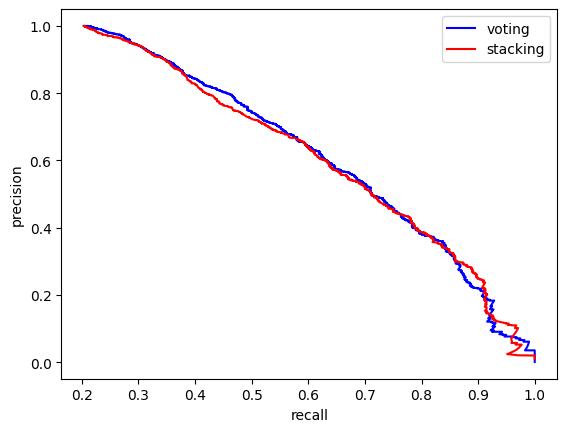

In [261]:
print("Getting Voting Scores")
y_valid_voting_prob = cross_val_predict(voting_pipeline, X_train, y_train, cv=3, method='predict_proba')
print("Getting Stacking Scores")
y_valid_stacking_prob = cross_val_predict(stacking_pipeline, X_train, y_train, cv=3, method='predict_proba')
precision_voting_scores, recall_voting_scores, voting_thresholds = precision_recall_curve(y_train, y_valid_voting_prob[:, 1])
precision_stacking_scores, recall_stacking_scores, stacking_thresholds = precision_recall_curve(y_train, y_valid_stacking_prob[:, 1])

plt.plot(precision_voting_scores[:-1], recall_voting_scores[:-1], label='voting', color='blue')
plt.plot(precision_stacking_scores[:-1], recall_stacking_scores[:-1], label='stacking', color='red')
plt.legend()
plt.xlabel('recall')
plt.ylabel('precision') # so we can pick threshold at precision = , Recall=

In [262]:
y_valid_stacking_predict = cross_val_predict(stacking_pipeline, X_train, y_train, cv=3, method='predict')
confusion_matrix(y_train, y_valid_stacking_predict)

array([[5853,  517],
       [ 693,  935]])

Text(0, 0.5, 'precision')

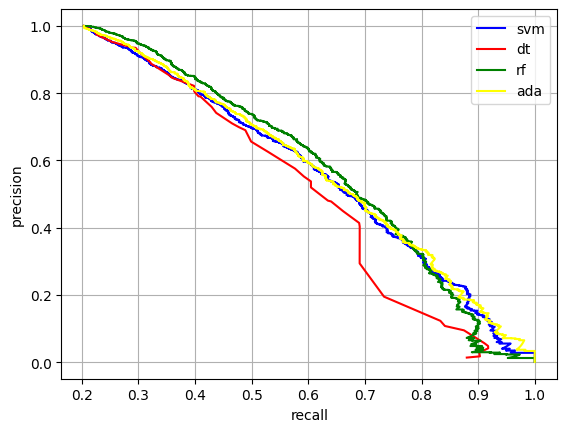

In [268]:
y_valid_svm_df = cross_val_predict(best_svm_clf_model, X_train, y_train, cv=3, method='decision_function')
y_valid_dt_prob = cross_val_predict(best_dt_clf_model, X_train, y_train, cv=3, method='predict_proba')
y_valid_rf_prob = cross_val_predict(best_rf_clf_model, X_train, y_train, cv=3, method='predict_proba')
y_valid_ada_prob = cross_val_predict(best_adaboost_clf_model, X_train, y_train, cv=3, method='predict_proba')

precision_svm_scores, recall_svm_scores, svm_thresholds = precision_recall_curve(y_train, y_valid_svm_df)
precision_dt_scores, recall_dt_scores, dt_thresholds = precision_recall_curve(y_train, y_valid_dt_prob[:, 1])
precision_rf_scores, recall_rf_scores, rf_thresholds = precision_recall_curve(y_train, y_valid_rf_prob[:, 1])
precision_ada_scores, recall_ada_scores, ada_thresholds = precision_recall_curve(y_train, y_valid_ada_prob[:, 1])

plt.plot(precision_svm_scores[:-1], recall_svm_scores[:-1], label='svm', color='blue')
plt.plot(precision_dt_scores[:-1], recall_dt_scores[:-1], label='dt', color='red')
plt.plot(precision_rf_scores[:-1], recall_rf_scores[:-1], label='rf', color='green')
plt.plot(precision_ada_scores[:-1], recall_ada_scores[:-1], label='ada', color='yellow')
plt.legend()
plt.grid()
plt.xlabel('recall')
plt.ylabel('precision')

Text(0, 0.5, 'precision')

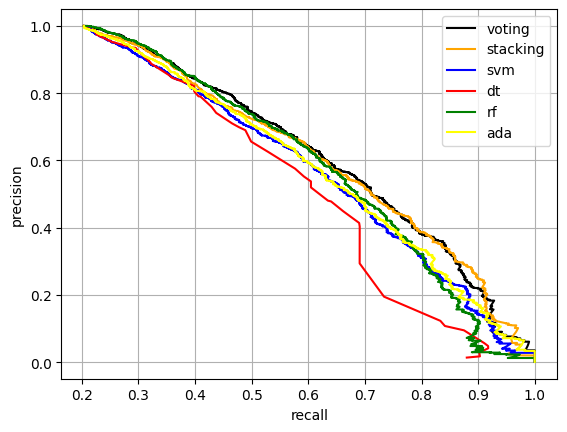

In [269]:
plt.plot(precision_voting_scores[:-1], recall_voting_scores[:-1], label='voting', color='black')
plt.plot(precision_stacking_scores[:-1], recall_stacking_scores[:-1], label='stacking', color='orange')
plt.plot(precision_svm_scores[:-1], recall_svm_scores[:-1], label='svm', color='blue')
plt.plot(precision_dt_scores[:-1], recall_dt_scores[:-1], label='dt', color='red')
plt.plot(precision_rf_scores[:-1], recall_rf_scores[:-1], label='rf', color='green')
plt.plot(precision_ada_scores[:-1], recall_ada_scores[:-1], label='ada', color='yellow')
plt.legend()
plt.grid()
plt.xlabel('recall')
plt.ylabel('precision') # best one at Recall=80% and Precision will be near 50% (good)

Text(0, 0.5, 'tpr')

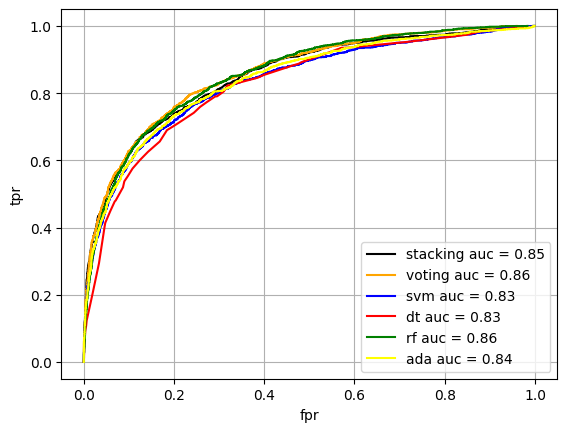

In [285]:
fpr_voting_scores, tpr_voting_scores, voting_roc_thresholds = roc_curve(y_train, y_valid_voting_prob[:, 1])
fpr_stacking_scores, tpr_stacking_scores, stacking_roc_thresholds = roc_curve(y_train, y_valid_stacking_prob[:, 1])
fpr_svm_scores, tpr_svm_scores, svm_roc_thresholds = roc_curve(y_train, y_valid_svm_df)
fpr_dt_scores, tpr_dt_scores, dt_roc_thresholds = roc_curve(y_train, y_valid_dt_prob[:, 1])
fpr_rf_scores, tpr_rf_scores, rf_roc_thresholds = roc_curve(y_train, y_valid_rf_prob[:, 1])
fpr_ada_scores, tpr_ada_scores, ada_roc_thresholds = roc_curve(y_train, y_valid_ada_prob[:, 1])

plt.plot(fpr_stacking_scores[:-1], tpr_stacking_scores[:-1], label=f'stacking auc = {roc_auc_score(y_train, y_valid_stacking_prob[:, 1]):.2f}', color='black')
plt.plot(fpr_voting_scores[:-1], tpr_voting_scores[:-1], label=f'voting auc = {roc_auc_score(y_train, y_valid_voting_prob[:, 1]):.2f}', color='orange')
plt.plot(fpr_svm_scores[:-1], tpr_svm_scores[:-1], label=f'svm auc = {roc_auc_score(y_train, y_valid_svm_df):.2f}', color='blue')
plt.plot(fpr_dt_scores[:-1], tpr_dt_scores[:-1], label=f'dt auc = {roc_auc_score(y_train, y_valid_dt_prob[:, 1]):.2f}', color='red')
plt.plot(fpr_rf_scores[:-1], tpr_rf_scores[:-1], label=f'rf auc = {roc_auc_score(y_train, y_valid_rf_prob[:, 1]):.2f}', color='green')
plt.plot(fpr_ada_scores[:-1], tpr_ada_scores[:-1], label=f'ada auc = {roc_auc_score(y_train, y_valid_ada_prob[:, 1]):.2f}', color='yellow')
plt.legend()
plt.grid()
plt.xlabel('fpr')
plt.ylabel('tpr')

In [ ]:
indx = np.argmax(recall_stacking_scores <= 0.80)
t_80_recall = stacking_thresholds[indx]
y_stacking_prob = cross_val_predict(stacking_pipeline, X_train, y_train, cv=3, method='predict_proba')
y_stacking_threshold_pred = (y_stacking_prob[:, 1] >= t_80_recall)
print(f"Accuracy: {accuracy_score(y_train, y_stacking_threshold_pred)}") # accuracy
print(f"F1 Score: {f1_score(y_train, y_stacking_threshold_pred)}") # F1
print(f"Precsion: {precision_score(y_train, y_stacking_threshold_pred)}") # Precsion
print(f"Recall: {recall_score(y_train, y_stacking_threshold_pred)}") # Recall

Accuracy: 0.735683920980245
F1 Score: 0.5511677282377919
Precsion: 0.42115509409474366
Recall: 0.7972972972972973


In [272]:
confusion_matrix(y_train, y_stacking_threshold_pred) 

array([[4586, 1784],
       [ 330, 1298]])

# 6) Test Performance and CI

In [273]:
y_stacking_test_pred = stacking_pipeline.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_stacking_test_pred)}") # Test accuracy
print(f"Test F1 Score: {f1_score(y_test, y_stacking_test_pred)}") # Test F1
print(f"Test Precsion: {precision_score(y_test, y_stacking_test_pred)}") # Test Precsion
print(f"Test Recall: {recall_score(y_test, y_stacking_test_pred)}") # Test Recall

Test Accuracy: 0.846
Test F1 Score: 0.5989583333333334
Test Precsion: 0.6371191135734072
Test Recall: 0.5651105651105651


In [274]:
confusion_matrix(y_test, y_stacking_test_pred)

array([[1462,  131],
       [ 177,  230]])

In [275]:
y_stacking_test_scores = stacking_pipeline.predict_proba(X_test)
y_stacking_test_threshold_pred = (y_stacking_test_scores[:, 1] >= t_80_recall)
print(f"Test Accuracy: {accuracy_score(y_test, y_stacking_test_threshold_pred)}") # Test accuracy
print(f"Test F1 Score: {f1_score(y_test, y_stacking_test_threshold_pred)}") # Test F1
print(f"Test Precsion: {precision_score(y_test, y_stacking_test_threshold_pred)}") # Test Precsion
print(f"Test Recall: {recall_score(y_test, y_stacking_test_threshold_pred)}") # Test Recall

Test Accuracy: 0.742
Test F1 Score: 0.5505226480836237
Test Precsion: 0.42645074224021595
Test Recall: 0.7764127764127764


In [276]:
confusion_matrix(y_test, y_stacking_test_threshold_pred)

array([[1168,  425],
       [  91,  316]])

# 7) Save Model

In [278]:
joblib.dump(stacking_pipeline, 'stacking_pipeline.pkl')

['stacking_pipeline.pkl']

# Future Plans test_accuracy = 85%:
 
### it always depend on base accuracy

1) Underfit:
- More Complex Model (XGBoost - CatBoost - LightGBM)
- Extract Relevent Features (RF.feature_importance_)